In [40]:
import mne
from MNE_Pipeline import MNE_Repo_Mat as MP
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import threading
import time

In [41]:
power_band_data = pd.read_csv('Average_band_power_data/AVerageBandPowerFeature_Skull_300itr.csv').values
cluster_RT_labels = pd.read_excel('Average_band_power_data/Skull_Iter_300_RTClass.xlsx', usecols='B', header=1).values.flatten()

In [42]:
def get_data_according_to_freq_band(data, start, end):
    freq_data = np.array([trial[start:end] for trial in data])
    freq_data = np.array([np.reshape(d,(64,1)) for d in freq_data])
    return freq_data

In [43]:
alpha_freq_data = get_data_according_to_freq_band(power_band_data, 0, 64)
beta_freq_data = get_data_according_to_freq_band(power_band_data, 64, 128)
gamma_freq_data = get_data_according_to_freq_band(power_band_data, 128, 192)

In [44]:
def get_cluster_band_data(band_data, cluster_label):
    indices = [i for i in range(len(cluster_RT_labels)) if cluster_RT_labels[i] == cluster_label]
    cluster_band_data = [band_data [i,:,:] for i in range(band_data.shape[0]) if i in indices]
    return np.array(cluster_band_data)

In [45]:
alpha_freq_data_cluster0 = get_cluster_band_data(alpha_freq_data, 0)
alpha_freq_data_cluster1 = get_cluster_band_data(alpha_freq_data, 1)
alpha_freq_data_cluster2 = get_cluster_band_data(alpha_freq_data, 2)
beta_freq_data_cluster0 = get_cluster_band_data(beta_freq_data, 0)
beta_freq_data_cluster1 = get_cluster_band_data(beta_freq_data, 1)
beta_freq_data_cluster2 = get_cluster_band_data(beta_freq_data, 2)
gamma_freq_data_cluster0 = get_cluster_band_data(gamma_freq_data, 0)
gamma_freq_data_cluster1 = get_cluster_band_data(gamma_freq_data, 1)
gamma_freq_data_cluster2 = get_cluster_band_data(gamma_freq_data, 2)

/home/kam/anaconda3/envs/mne/lib/python3.7/site-packages/mne/utils/docs.py:830: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
/home/kam/anaconda3/envs/mne/lib/python3.7/site-packages/mne/utils/docs.py:813: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/kam/CP Project/MNE_Pipeline.py:34: DeprecationWarning: Setting a montage using anything rather than DigMontage is deprecated and will raise an error in v0.20. Please use ``read_dig_fif``, 

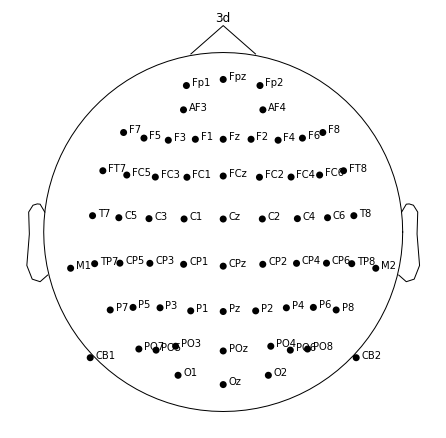

/home/kam/CP Project/MNE_Pipeline.py:40: DeprecationWarning: Setting a montage using anything rather than DigMontage is deprecated and will raise an error in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_dig_polhemus_isotrak``, or ``read_dig_captrack`` ``read_dig_hpts``, ``read_dig_captrack`` or ``read_custom_montage`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays.
  self.info = mne.create_info(montage.ch_names, sfreq, ch_types='eeg', montage=montage)


In [46]:
_mne = MP()

info = _mne.construct_info()

In [59]:
sample_alpha = alpha_freq_data_cluster0[2,:,:]
sample_beta = beta_freq_data_cluster0[2,:,:]
sample_gamma = gamma_freq_data_cluster0[2,:,:]


In [60]:
sample_alpha_erp = mne.EvokedArray(sample_alpha, info)
sample_beta_erp = mne.EvokedArray(sample_beta, info, tmin=0)
sample_gamma_erp = mne.EvokedArray(sample_gamma, info, tmin=0)
np.array_equal(sample_beta_erp.data, sample_gamma_erp.data)

False

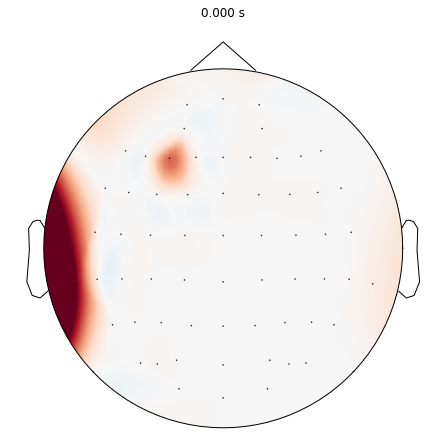

In [72]:
fig = sample_alpha_erp.plot_topomap(times = [0], colorbar=False, contours=0, size=5)
fig.savefig('alpha_img')

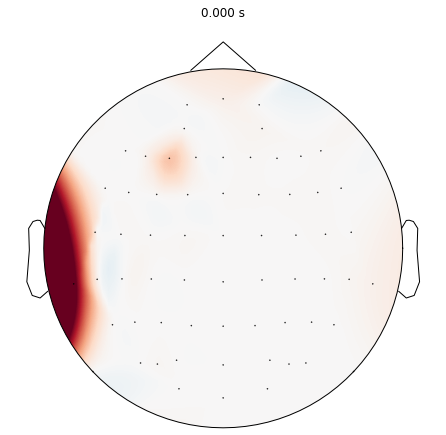

In [73]:
fig = sample_beta_erp.plot_topomap(times = [0], colorbar=False, contours=0, size=5)
fig.savefig('beta_img')

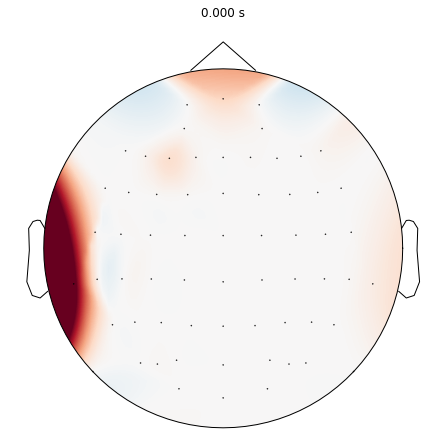

In [74]:
fig = sample_gamma_erp.plot_topomap(times = [0], colorbar=False, contours=0, size=5)
fig.savefig('gamma_img')

In [8]:
def generate_save_topomap_for_freq_data(freq_cluster_data, cluster_label, info, band='alpha'):
    
    folder_path = 'pw_band_topomaps'
    cluster0_path = folder_path + '/cluster 0'
    cluster1_path = folder_path + '/cluster 1'
    cluster2_path = folder_path + '/cluster 2'
    
    if not os.path.exists(folder_path):
        try:
            os.mkdir(folder_path)
            os.mkdir(cluster0_path)
            os.mkdir(cluster1_path)
            os.mkdir(cluster2_path)
        except OSError as e:
            print('Could not create directories because of: ', e.strerror)
        else:
            print('Successfully created all files')

    
    if cluster_label == 0:
        cluster_freq_path = cluster0_path + '/' + band
    if cluster_label == 1:
        cluster_freq_path = cluster1_path + '/' + band
    if cluster_label == 2:
        cluster_freq_path = cluster2_path + '/' + band
    
    
    if not os.path.exists(cluster_freq_path):
        os.mkdir(cluster_freq_path)
    
    
    for band_data, i in zip(freq_cluster_data, range(len(freq_cluster_data))):
        evoked_band_data = mne.EvokedArray(band_data, info)
        time.sleep(0.1)
        fig = evoked_band_data.plot_topomap(times = [0], show=False, show_names=True, size=5, 
                                            colorbar=False, sensors=True, title=None)
        time.sleep(0.1)
        path_to_save = cluster_freq_path + '/' + str(i) + '.png' 
        fig.savefig(path_to_save)
        plt.clf()
        print('saved file: ', path_to_save)
        
        

In [9]:
T1_alpha = threading.Thread(target=generate_save_topomap_for_freq_data, args=(alpha_freq_data_cluster1, 1, info,))
T2_alpha = threading.Thread(target=generate_save_topomap_for_freq_data, args=(alpha_freq_data_cluster2, 2, info,))

T0_beta = threading.Thread(target=generate_save_topomap_for_freq_data, args=(beta_freq_data_cluster0, 0, 
                                                                             info, 'beta',))

T1_beta = threading.Thread(target=generate_save_topomap_for_freq_data, args=(beta_freq_data_cluster1, 1, 
                                                                             info, 'beta',))

T2_beta = threading.Thread(target=generate_save_topomap_for_freq_data, args=(beta_freq_data_cluster2, 2, 
                                                                             info, 'beta',))

T0_gamma = threading.Thread(target=generate_save_topomap_for_freq_data, args=(gamma_freq_data_cluster0, 0, 
                                                                             info, 'gamma',))

T1_gamma = threading.Thread(target=generate_save_topomap_for_freq_data, args=(gamma_freq_data_cluster1, 1, 
                                                                             info, 'gamma',))

T2_gamma = threading.Thread(target=generate_save_topomap_for_freq_data, args=(gamma_freq_data_cluster2, 2, 
                                                                             info, 'gamma',))

In [ ]:
# T1_beta.start()

# T1_beta.join()

In [ ]:
# T2_beta.start()

# T2_beta.join()

In [ ]:
# T0_gamma.start()

# T0_gamma.join()

In [ ]:
# T1_gamma.start()

# T1_gamma.join()

In [10]:
T2_gamma.start()

T2_gamma.join()

saved file:  pw_band_topomaps/cluster 2/gamma/0.png
saved file:  pw_band_topomaps/cluster 2/gamma/1.png
saved file:  pw_band_topomaps/cluster 2/gamma/2.png
saved file:  pw_band_topomaps/cluster 2/gamma/3.png
saved file:  pw_band_topomaps/cluster 2/gamma/4.png
saved file:  pw_band_topomaps/cluster 2/gamma/5.png
saved file:  pw_band_topomaps/cluster 2/gamma/6.png
saved file:  pw_band_topomaps/cluster 2/gamma/7.png
saved file:  pw_band_topomaps/cluster 2/gamma/8.png
saved file:  pw_band_topomaps/cluster 2/gamma/9.png
saved file:  pw_band_topomaps/cluster 2/gamma/10.png
saved file:  pw_band_topomaps/cluster 2/gamma/11.png
saved file:  pw_band_topomaps/cluster 2/gamma/12.png
saved file:  pw_band_topomaps/cluster 2/gamma/13.png
saved file:  pw_band_topomaps/cluster 2/gamma/14.png
saved file:  pw_band_topomaps/cluster 2/gamma/15.png
saved file:  pw_band_topomaps/cluster 2/gamma/16.png
saved file:  pw_band_topomaps/cluster 2/gamma/17.png
saved file:  pw_band_topomaps/cluster 2/gamma/18.png
sav

/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/20.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/21.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/22.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/23.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/24.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/25.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/26.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/27.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/28.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/29.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/30.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/31.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/32.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/33.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/34.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/35.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/36.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/37.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/38.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/39.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/40.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/41.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/42.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/43.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/44.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/45.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/46.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/47.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/48.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/49.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/50.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/51.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/52.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/53.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/54.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/55.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/56.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/57.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/58.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/59.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/60.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/61.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/62.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/63.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/64.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/65.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/66.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/67.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/68.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/69.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/70.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/71.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/72.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/73.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/74.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/75.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/76.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/77.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/78.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/79.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/80.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/81.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/82.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/83.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/84.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/85.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/86.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/87.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/88.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/89.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/90.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/91.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/92.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/93.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/94.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/95.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/96.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/97.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/98.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/99.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/100.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/101.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/102.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/103.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/104.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/105.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/106.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/107.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/108.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/109.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/110.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/111.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/112.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/113.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/114.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/115.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/116.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/117.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/118.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/119.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/120.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/121.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/122.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/123.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/124.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/125.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/126.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/127.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/128.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/129.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/130.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/131.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/132.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/133.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/134.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/135.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/136.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/137.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/138.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/139.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/140.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/141.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/142.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/143.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/144.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/145.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/146.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/147.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/148.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/149.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/150.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/151.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/152.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/153.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/154.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/155.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/156.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/157.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/158.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/159.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/160.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/161.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/162.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/163.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/164.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/165.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/166.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/167.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/168.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/169.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/170.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/171.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/172.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/173.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/174.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/175.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/176.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/177.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/178.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/179.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/180.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/181.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/182.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/183.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/184.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/185.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/186.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/187.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/188.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/189.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/190.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/191.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/192.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/193.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/194.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/195.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/196.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/197.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/198.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/199.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/200.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/201.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/202.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/203.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/204.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/205.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/206.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/207.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/208.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/209.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/210.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/211.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/212.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/213.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/214.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/215.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/216.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/217.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/218.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/219.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/220.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/221.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/222.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/223.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/224.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/225.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/226.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/227.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/228.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/229.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/230.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/231.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/232.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/233.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/234.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/235.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/236.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/237.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/238.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/239.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/240.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/241.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/242.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/243.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/244.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/245.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/246.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/247.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/248.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/249.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/250.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/251.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/252.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/253.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/254.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/255.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/256.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/257.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/258.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/259.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/260.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/261.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/262.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/263.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/264.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/265.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/266.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/267.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/268.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/269.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/270.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/271.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/272.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/273.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/274.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/275.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/276.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/277.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/278.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/279.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/280.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/281.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/282.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/283.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/284.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/285.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/286.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/287.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/288.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/289.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/290.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/291.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/292.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/293.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/294.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/295.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/296.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/297.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/298.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/299.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/300.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/301.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/302.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/303.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/304.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/305.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/306.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/307.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/308.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/309.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/310.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/311.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/312.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/313.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/314.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/315.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/316.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/317.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/318.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/319.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/320.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/321.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/322.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/323.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/324.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/325.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/326.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/327.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/328.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/329.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/330.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/331.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/332.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/333.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/334.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/335.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/336.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/337.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/338.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/339.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/340.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/341.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/342.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/343.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/344.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/345.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/346.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/347.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/348.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/349.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/350.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/351.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/352.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/353.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/354.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/355.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/356.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/357.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/358.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/359.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/360.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/361.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/362.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/363.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/364.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/365.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/366.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/367.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/368.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/369.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/370.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/371.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/372.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/373.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/374.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/375.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/376.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/377.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/378.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/379.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/380.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/381.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/382.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/383.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/384.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/385.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/386.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/387.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/388.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/389.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/390.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/391.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/392.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/393.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/394.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/395.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/396.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/397.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/398.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/399.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/400.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/401.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/402.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/403.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/404.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/405.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/406.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/407.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/408.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/409.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/410.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/411.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/412.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/413.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/414.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/415.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/416.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/417.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/418.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/419.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/420.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/421.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/422.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/423.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/424.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/425.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/426.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/427.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/428.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/429.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/430.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/431.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/432.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/433.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/434.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/435.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/436.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/437.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/438.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/439.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/440.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/441.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/442.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/443.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/444.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/445.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/446.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/447.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/448.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/449.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/450.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/451.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/452.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/453.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/454.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/455.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/456.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/457.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/458.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/459.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/460.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/461.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/462.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/463.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/464.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/465.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/466.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/467.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/468.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/469.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/470.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/471.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/472.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/473.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/474.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/475.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/476.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/477.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/478.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/479.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/480.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/481.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/482.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/483.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/484.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/485.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/486.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/487.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/488.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/489.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/490.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/491.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/492.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/493.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/494.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/495.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/496.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/497.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/498.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/499.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/500.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/501.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/502.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/503.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/504.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/505.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/506.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/507.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/508.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/509.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/510.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/511.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/512.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/513.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/514.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/515.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/516.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/517.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/518.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/519.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/520.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/521.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/522.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/523.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/524.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/525.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/526.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/527.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/528.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/529.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/530.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/531.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/532.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/533.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/534.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/535.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/536.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/537.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/538.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/539.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/540.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/541.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/542.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/543.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/544.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/545.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/546.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/547.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/548.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/549.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/550.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/551.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/552.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/553.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/554.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/555.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/556.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/557.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/558.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/559.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/560.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/561.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/562.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/563.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/564.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/565.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/566.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/567.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/568.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/569.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/570.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/571.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/572.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/573.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/574.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/575.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/576.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/577.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/578.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/579.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/580.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/581.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/582.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/583.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/584.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/585.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/586.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/587.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/588.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/589.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/590.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/591.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/592.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/593.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/594.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/595.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/596.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/597.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/598.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/599.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/600.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/601.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/602.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/603.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/604.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/605.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/606.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/607.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/608.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/609.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/610.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/611.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/612.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/613.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/614.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/615.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/616.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/617.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/618.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/619.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/620.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/621.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/622.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/623.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/624.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/625.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/626.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/627.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/628.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/629.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/630.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/631.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/632.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/633.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/634.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/635.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/636.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/637.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/638.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/639.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/640.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/641.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/642.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/643.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/644.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/645.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/646.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/647.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/648.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/649.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/650.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/651.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/652.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/653.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/654.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/655.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/656.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/657.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/658.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/659.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/660.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/661.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/662.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/663.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/664.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/665.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/666.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/667.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/668.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/669.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/670.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/671.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/672.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/673.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/674.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/675.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/676.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/677.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/678.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/679.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/680.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/681.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/682.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/683.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/684.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/685.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/686.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/687.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/688.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/689.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/690.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/691.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/692.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/693.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/694.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/695.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/696.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/697.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/698.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/699.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/700.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/701.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/702.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/703.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/704.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/705.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/706.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/707.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/708.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/709.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/710.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/711.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/712.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/713.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/714.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/715.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/716.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/717.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/718.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/719.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/720.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/721.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/722.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/723.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/724.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/725.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/726.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/727.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/728.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/729.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/730.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/731.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/732.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/733.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/734.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/735.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/736.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/737.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/738.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/739.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/740.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/741.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/742.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/743.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/744.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/745.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/746.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/747.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/748.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/749.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/750.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/751.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/752.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/753.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/754.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/755.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/756.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/757.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/758.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/759.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/760.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/761.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/762.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/763.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/764.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/765.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/766.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/767.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/768.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/769.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/770.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/771.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/772.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/773.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/774.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/775.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/776.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/777.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/778.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/779.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/780.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/781.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/782.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/783.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/784.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/785.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/786.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/787.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/788.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/789.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/790.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/791.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/792.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/793.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/794.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/795.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/796.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/797.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/798.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/799.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/800.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/801.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/802.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/803.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/804.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/805.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/806.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/807.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/808.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/809.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/810.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/811.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/812.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/813.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/814.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/815.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/816.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/817.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/818.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/819.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/820.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/821.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/822.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/823.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/824.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/825.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/826.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/827.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/828.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/829.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/830.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/831.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/832.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/833.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/834.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/835.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/836.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/837.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/838.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/839.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/840.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/841.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/842.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/843.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/844.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/845.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/846.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/847.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/848.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/849.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/850.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/851.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/852.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/853.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/854.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/855.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/856.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/857.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/858.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/859.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/860.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/861.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/862.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/863.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/864.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/865.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/866.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/867.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/868.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/869.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/870.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/871.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/872.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/873.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/874.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/875.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/876.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/877.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/878.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/879.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/880.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/881.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/882.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/883.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/884.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/885.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/886.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/887.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/888.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/889.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/890.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/891.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/892.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/893.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/894.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/895.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/896.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/897.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/898.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/899.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/900.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/901.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/902.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/903.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/904.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/905.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/906.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/907.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/908.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/909.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/910.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/911.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/912.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/913.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/914.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/915.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/916.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/917.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/918.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/919.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/920.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/921.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/922.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/923.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/924.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/925.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/926.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/927.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/928.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/929.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/930.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/931.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/932.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/933.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/934.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/935.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/936.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/937.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/938.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/939.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/940.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/941.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/942.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/943.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/944.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/945.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/946.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/947.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/948.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/949.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/950.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/951.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/952.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/953.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/954.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/955.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/956.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/957.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/958.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/959.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/960.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/961.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/962.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/963.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/964.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/965.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/966.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/967.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/968.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/969.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/970.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/971.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/972.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/973.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/974.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/975.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/976.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/977.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/978.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/979.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/980.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/981.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/982.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/983.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/984.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/985.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/986.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/987.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/988.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/989.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/990.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/991.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/992.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/993.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/994.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/995.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/996.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/997.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/998.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/999.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1000.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1001.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1002.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1003.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1004.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1005.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1006.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1007.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1008.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1009.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1010.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1011.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1012.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1013.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1014.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1015.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1016.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1017.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1018.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1019.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1020.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1021.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1022.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1023.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1024.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1025.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1026.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1027.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1028.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1029.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1030.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1031.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1032.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1033.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1034.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1035.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1036.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1037.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1038.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1039.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1040.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1041.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1042.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1043.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1044.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1045.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1046.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1047.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1048.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1049.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1050.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1051.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1052.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1053.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1054.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1055.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1056.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1057.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1058.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1059.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1060.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1061.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1062.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1063.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1064.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1065.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1066.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1067.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1068.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1069.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1070.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1071.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1072.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1073.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1074.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1075.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1076.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1077.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1078.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1079.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1080.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1081.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1082.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1083.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1084.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1085.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1086.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1087.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1088.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1089.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1090.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1091.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1092.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1093.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1094.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1095.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1096.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1097.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1098.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1099.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1100.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1101.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1102.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1103.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1104.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1105.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1106.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1107.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1108.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1109.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1110.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1111.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1112.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1113.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1114.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1115.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1116.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1117.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1118.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1119.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1120.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1121.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1122.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1123.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1124.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1125.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1126.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1127.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1128.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1129.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1130.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1131.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1132.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1133.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1134.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1135.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1136.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1137.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1138.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1139.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1140.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1141.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1142.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1143.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1144.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1145.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1146.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1147.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1148.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1149.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1150.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1151.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1152.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1153.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1154.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1155.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1156.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1157.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1158.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1159.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1160.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1161.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1162.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1163.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1164.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1165.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1166.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1167.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1168.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1169.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1170.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1171.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1172.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1173.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1174.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1175.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1176.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1177.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1178.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1179.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1180.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1181.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1182.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1183.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1184.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1185.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1186.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1187.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1188.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1189.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1190.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1191.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1192.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1193.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1194.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1195.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1196.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1197.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1198.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1199.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1200.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1201.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1202.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1203.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1204.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1205.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1206.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1207.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1208.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1209.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1210.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1211.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1212.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1213.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1214.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1215.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1216.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1217.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1218.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1219.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1220.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1221.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1222.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1223.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1224.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1225.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1226.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1227.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1228.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1229.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1230.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1231.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1232.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1233.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1234.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1235.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1236.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1237.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1238.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1239.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1240.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1241.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1242.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1243.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1244.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1245.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1246.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1247.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1248.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1249.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1250.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1251.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1252.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1253.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1254.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1255.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1256.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1257.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1258.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1259.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1260.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1261.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1262.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1263.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1264.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1265.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1266.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1267.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1268.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1269.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1270.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1271.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1272.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1273.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1274.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1275.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1276.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1277.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1278.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1279.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1280.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1281.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1282.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1283.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1284.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1285.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1286.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1287.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1288.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1289.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1290.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1291.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1292.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1293.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1294.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1295.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1296.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1297.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1298.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1299.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1300.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1301.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1302.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1303.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1304.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1305.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1306.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1307.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1308.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1309.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1310.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1311.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1312.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1313.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1314.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1315.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1316.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1317.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1318.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1319.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1320.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1321.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1322.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1323.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1324.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1325.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1326.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1327.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1328.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1329.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1330.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1331.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1332.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1333.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1334.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1335.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1336.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1337.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1338.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1339.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1340.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1341.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1342.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1343.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1344.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1345.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1346.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1347.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1348.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1349.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1350.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1351.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1352.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1353.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1354.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1355.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1356.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1357.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1358.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1359.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1360.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1361.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1362.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1363.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1364.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1365.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1366.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1367.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1368.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1369.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1370.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1371.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1372.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1373.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1374.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1375.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1376.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1377.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1378.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1379.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1380.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1381.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1382.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1383.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1384.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1385.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1386.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1387.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1388.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1389.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1390.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1391.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1392.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1393.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1394.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1395.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1396.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1397.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1398.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1399.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1400.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1401.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1402.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1403.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1404.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1405.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1406.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1407.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1408.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1409.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1410.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1411.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1412.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1413.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1414.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1415.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1416.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1417.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1418.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1419.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1420.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1421.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1422.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1423.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1424.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1425.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1426.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1427.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1428.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1429.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1430.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1431.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1432.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1433.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1434.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1435.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1436.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1437.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1438.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1439.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1440.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1441.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1442.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1443.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1444.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1445.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1446.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1447.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1448.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1449.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1450.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1451.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1452.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1453.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1454.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1455.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1456.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1457.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1458.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1459.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1460.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1461.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1462.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1463.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1464.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1465.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1466.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1467.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1468.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1469.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1470.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1471.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1472.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1473.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1474.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1475.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1476.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1477.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1478.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1479.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1480.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1481.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1482.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1483.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1484.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1485.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1486.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1487.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1488.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1489.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1490.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1491.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1492.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1493.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1494.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1495.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1496.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1497.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1498.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1499.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1500.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1501.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1502.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1503.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1504.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1505.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1506.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1507.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1508.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1509.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1510.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1511.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1512.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1513.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1514.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1515.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1516.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1517.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1518.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1519.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1520.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1521.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1522.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1523.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1524.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1525.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1526.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1527.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1528.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1529.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1530.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1531.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1532.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1533.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1534.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1535.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1536.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1537.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1538.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1539.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1540.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1541.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1542.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1543.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1544.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1545.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1546.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1547.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1548.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1549.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1550.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1551.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1552.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1553.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1554.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1555.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1556.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1557.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1558.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1559.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1560.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1561.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1562.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1563.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1564.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1565.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1566.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1567.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1568.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1569.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1570.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1571.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1572.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1573.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1574.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1575.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1576.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1577.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1578.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1579.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1580.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1581.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1582.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1583.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1584.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1585.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1586.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1587.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1588.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1589.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1590.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1591.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1592.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1593.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1594.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1595.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1596.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1597.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1598.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1599.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1600.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1601.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1602.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1603.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1604.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1605.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1606.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1607.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1608.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1609.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1610.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1611.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1612.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1613.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1614.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1615.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1616.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1617.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1618.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1619.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1620.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1621.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1622.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1623.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1624.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1625.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1626.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1627.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1628.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1629.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1630.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1631.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1632.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1633.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1634.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1635.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1636.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1637.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1638.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1639.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1640.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1641.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1642.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1643.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1644.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1645.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1646.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1647.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1648.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1649.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1650.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1651.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1652.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1653.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1654.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1655.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1656.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1657.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1658.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1659.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1660.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1661.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1662.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1663.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1664.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1665.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1666.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1667.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1668.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1669.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1670.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1671.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1672.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1673.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1674.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1675.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1676.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1677.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1678.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1679.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1680.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1681.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1682.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1683.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1684.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1685.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1686.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1687.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1688.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1689.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1690.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1691.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1692.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1693.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1694.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1695.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1696.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1697.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1698.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1699.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1700.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1701.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1702.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1703.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1704.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1705.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1706.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1707.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1708.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1709.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1710.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1711.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1712.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1713.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1714.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1715.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1716.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1717.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1718.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1719.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1720.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1721.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1722.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1723.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1724.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1725.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1726.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1727.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1728.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1729.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1730.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1731.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1732.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1733.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1734.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1735.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1736.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1737.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1738.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1739.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1740.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1741.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1742.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1743.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1744.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1745.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1746.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1747.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1748.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1749.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1750.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1751.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1752.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1753.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1754.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1755.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1756.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1757.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1758.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1759.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1760.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1761.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1762.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1763.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1764.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1765.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1766.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1767.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1768.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1769.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1770.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1771.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1772.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1773.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1774.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1775.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1776.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1777.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1778.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1779.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1780.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1781.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1782.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1783.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1784.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1785.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1786.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1787.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1788.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1789.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1790.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1791.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1792.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1793.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1794.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1795.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1796.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1797.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1798.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1799.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1800.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1801.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1802.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1803.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1804.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1805.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1806.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1807.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1808.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1809.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1810.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1811.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1812.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1813.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1814.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1815.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1816.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1817.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1818.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1819.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1820.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1821.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1822.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1823.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1824.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1825.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1826.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1827.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1828.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1829.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1830.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1831.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1832.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1833.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1834.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1835.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1836.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1837.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1838.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1839.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1840.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1841.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1842.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1843.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1844.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1845.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1846.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1847.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1848.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1849.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1850.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1851.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1852.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1853.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1854.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1855.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1856.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1857.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1858.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1859.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1860.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1861.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1862.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1863.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1864.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1865.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1866.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1867.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1868.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1869.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1870.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1871.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1872.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1873.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1874.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1875.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1876.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1877.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1878.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1879.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1880.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1881.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1882.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1883.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1884.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1885.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1886.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1887.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1888.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1889.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1890.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1891.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1892.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1893.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1894.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1895.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1896.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1897.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1898.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1899.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1900.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1901.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1902.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1903.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1904.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1905.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1906.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1907.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1908.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1909.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1910.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1911.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1912.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1913.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1914.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1915.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1916.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1917.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1918.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1919.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1920.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1921.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1922.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1923.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1924.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1925.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1926.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1927.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1928.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1929.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1930.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1931.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1932.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1933.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1934.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1935.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1936.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1937.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1938.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1939.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1940.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1941.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1942.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1943.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1944.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1945.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1946.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1947.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1948.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1949.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1950.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1951.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1952.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1953.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1954.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1955.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1956.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1957.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1958.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1959.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1960.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1961.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1962.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1963.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1964.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1965.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1966.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1967.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1968.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1969.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1970.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1971.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1972.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1973.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1974.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1975.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1976.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1977.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1978.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1979.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1980.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1981.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1982.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1983.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1984.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1985.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1986.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1987.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1988.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1989.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1990.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1991.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1992.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1993.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1994.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1995.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1996.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1997.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1998.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/1999.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2000.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2001.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2002.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2003.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2004.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2005.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2006.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2007.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2008.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2009.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2010.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2011.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2012.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2013.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2014.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2015.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2016.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2017.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2018.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2019.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2020.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2021.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2022.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2023.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2024.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2025.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2026.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2027.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2028.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2029.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2030.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2031.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2032.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2033.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2034.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2035.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2036.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2037.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2038.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2039.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2040.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2041.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2042.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2043.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2044.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2045.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2046.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2047.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2048.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2049.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2050.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2051.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2052.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2053.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2054.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2055.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2056.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2057.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2058.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2059.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2060.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2061.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2062.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2063.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2064.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2065.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2066.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2067.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2068.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2069.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2070.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2071.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2072.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2073.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2074.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2075.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2076.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2077.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2078.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2079.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2080.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2081.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2082.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2083.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2084.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2085.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2086.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2087.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2088.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2089.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2090.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2091.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2092.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2093.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2094.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2095.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2096.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2097.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2098.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2099.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2100.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2101.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2102.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2103.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2104.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2105.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2106.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2107.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2108.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2109.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2110.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2111.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2112.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2113.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2114.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2115.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2116.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2117.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2118.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2119.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2120.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2121.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2122.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2123.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2124.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2125.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2126.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2127.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2128.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2129.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2130.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2131.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2132.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2133.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2134.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2135.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2136.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2137.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2138.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2139.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2140.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2141.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2142.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2143.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2144.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2145.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2146.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2147.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2148.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2149.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2150.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2151.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2152.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2153.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2154.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2155.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2156.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2157.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2158.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2159.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2160.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2161.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2162.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2163.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2164.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2165.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2166.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2167.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2168.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2169.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2170.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2171.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2172.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2173.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2174.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2175.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2176.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2177.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2178.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2179.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2180.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2181.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2182.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2183.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2184.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2185.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2186.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2187.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2188.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2189.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2190.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2191.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2192.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2193.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2194.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2195.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2196.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2197.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2198.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2199.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2200.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2201.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2202.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2203.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2204.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2205.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2206.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2207.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2208.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2209.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2210.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2211.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2212.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2213.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2214.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2215.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2216.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2217.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2218.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2219.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2220.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2221.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2222.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2223.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2224.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2225.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2226.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2227.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2228.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2229.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2230.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2231.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2232.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2233.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2234.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2235.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2236.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2237.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2238.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2239.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2240.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2241.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2242.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2243.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2244.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2245.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2246.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2247.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2248.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2249.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2250.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2251.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2252.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2253.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2254.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2255.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2256.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2257.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2258.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2259.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2260.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2261.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2262.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2263.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2264.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2265.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2266.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2267.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2268.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2269.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2270.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2271.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2272.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2273.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2274.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2275.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2276.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2277.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2278.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2279.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2280.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2281.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2282.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2283.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2284.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2285.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2286.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2287.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2288.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2289.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2290.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2291.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2292.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2293.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2294.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2295.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2296.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2297.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2298.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2299.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2300.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2301.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2302.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2303.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2304.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2305.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2306.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2307.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2308.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2309.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2310.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2311.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2312.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2313.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2314.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2315.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2316.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2317.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2318.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2319.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2320.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2321.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2322.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2323.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2324.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2325.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2326.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2327.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2328.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2329.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2330.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2331.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2332.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2333.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2334.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2335.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2336.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2337.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2338.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2339.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2340.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2341.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2342.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2343.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2344.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2345.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2346.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2347.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2348.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2349.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2350.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2351.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2352.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2353.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2354.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2355.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2356.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2357.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2358.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2359.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2360.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2361.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2362.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2363.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2364.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2365.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2366.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2367.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2368.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2369.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2370.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2371.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2372.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2373.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2374.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2375.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2376.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2377.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2378.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2379.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2380.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2381.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2382.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2383.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2384.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2385.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2386.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2387.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2388.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2389.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2390.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2391.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2392.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2393.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2394.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2395.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2396.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2397.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2398.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2399.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2400.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2401.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2402.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2403.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2404.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2405.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2406.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2407.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2408.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2409.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2410.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2411.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2412.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2413.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2414.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2415.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2416.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2417.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2418.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2419.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2420.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2421.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2422.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2423.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2424.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2425.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2426.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2427.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2428.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2429.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2430.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2431.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2432.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2433.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2434.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2435.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2436.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2437.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2438.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2439.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2440.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2441.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2442.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2443.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2444.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2445.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2446.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2447.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2448.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2449.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2450.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2451.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2452.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2453.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2454.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2455.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2456.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2457.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2458.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2459.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2460.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2461.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2462.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2463.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2464.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2465.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2466.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2467.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2468.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2469.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2470.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2471.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2472.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2473.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2474.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2475.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2476.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2477.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2478.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2479.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2480.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2481.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2482.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2483.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2484.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2485.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2486.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2487.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2488.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2489.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2490.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2491.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2492.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2493.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2494.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2495.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2496.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2497.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2498.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2499.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2500.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2501.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2502.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2503.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2504.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2505.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2506.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2507.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2508.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2509.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2510.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2511.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2512.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2513.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2514.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2515.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2516.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2517.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2518.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2519.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2520.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2521.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2522.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2523.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2524.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2525.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2526.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2527.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2528.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2529.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2530.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2531.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2532.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2533.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2534.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2535.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2536.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2537.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2538.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2539.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2540.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2541.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2542.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2543.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2544.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2545.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2546.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2547.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2548.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2549.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2550.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2551.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2552.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2553.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2554.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2555.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2556.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2557.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2558.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2559.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2560.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2561.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2562.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2563.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2564.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2565.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2566.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2567.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2568.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2569.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2570.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2571.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2572.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2573.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2574.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2575.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2576.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2577.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2578.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2579.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2580.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2581.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2582.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2583.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2584.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2585.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2586.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2587.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2588.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2589.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2590.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2591.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2592.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2593.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2594.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2595.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2596.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2597.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2598.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2599.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2600.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2601.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2602.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2603.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2604.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2605.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2606.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2607.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2608.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2609.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2610.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2611.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2612.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2613.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2614.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2615.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2616.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2617.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2618.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2619.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2620.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2621.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2622.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2623.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2624.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2625.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2626.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2627.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2628.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2629.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2630.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2631.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2632.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2633.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2634.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2635.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2636.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2637.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2638.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2639.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2640.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2641.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2642.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2643.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2644.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2645.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2646.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2647.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2648.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2649.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2650.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2651.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2652.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2653.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2654.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2655.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2656.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2657.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2658.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2659.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2660.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2661.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2662.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2663.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2664.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2665.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2666.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2667.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2668.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2669.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2670.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2671.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2672.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2673.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2674.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2675.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2676.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2677.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2678.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2679.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2680.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2681.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2682.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2683.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2684.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2685.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2686.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2687.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2688.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2689.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2690.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2691.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2692.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2693.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2694.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2695.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2696.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2697.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2698.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2699.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2700.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2701.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2702.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2703.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2704.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2705.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2706.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2707.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2708.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2709.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2710.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2711.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2712.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2713.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2714.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2715.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2716.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2717.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2718.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2719.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2720.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2721.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2722.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2723.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2724.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2725.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2726.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2727.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2728.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2729.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2730.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2731.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2732.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2733.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2734.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2735.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2736.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2737.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2738.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2739.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2740.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2741.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2742.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2743.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2744.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2745.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2746.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2747.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2748.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2749.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2750.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2751.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2752.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2753.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2754.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2755.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2756.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2757.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2758.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2759.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2760.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2761.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2762.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2763.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2764.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2765.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2766.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2767.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2768.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2769.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2770.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2771.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2772.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2773.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2774.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2775.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2776.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2777.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2778.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2779.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2780.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2781.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2782.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2783.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2784.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2785.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2786.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2787.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2788.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2789.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2790.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2791.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2792.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2793.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2794.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2795.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2796.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2797.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2798.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2799.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2800.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2801.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2802.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2803.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2804.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2805.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2806.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2807.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2808.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2809.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2810.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2811.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2812.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2813.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2814.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2815.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2816.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2817.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2818.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2819.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2820.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2821.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2822.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2823.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2824.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2825.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2826.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2827.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2828.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2829.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2830.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2831.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2832.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2833.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2834.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2835.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2836.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2837.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2838.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2839.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2840.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2841.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2842.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2843.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2844.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2845.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2846.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2847.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2848.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2849.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2850.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2851.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2852.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2853.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2854.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2855.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2856.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2857.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2858.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2859.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2860.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2861.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2862.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2863.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2864.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2865.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2866.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2867.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2868.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2869.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2870.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2871.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2872.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2873.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2874.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2875.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2876.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2877.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2878.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2879.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2880.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2881.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2882.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2883.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2884.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2885.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2886.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2887.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2888.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2889.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2890.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2891.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2892.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2893.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2894.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2895.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2896.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2897.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2898.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2899.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2900.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2901.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2902.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2903.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2904.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2905.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2906.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2907.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2908.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2909.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2910.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2911.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2912.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2913.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2914.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2915.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2916.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2917.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2918.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2919.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2920.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2921.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2922.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2923.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2924.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2925.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2926.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2927.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2928.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2929.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2930.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2931.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2932.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2933.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2934.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2935.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2936.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2937.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2938.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2939.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2940.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2941.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2942.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2943.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2944.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2945.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2946.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2947.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2948.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2949.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2950.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2951.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2952.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2953.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2954.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2955.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2956.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2957.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2958.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2959.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2960.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2961.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2962.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2963.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2964.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2965.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2966.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2967.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2968.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2969.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2970.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2971.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2972.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2973.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2974.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2975.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2976.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2977.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2978.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2979.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2980.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2981.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2982.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2983.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2984.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2985.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2986.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2987.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2988.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2989.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2990.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2991.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2992.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2993.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2994.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2995.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2996.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2997.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2998.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/2999.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3000.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3001.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3002.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3003.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3004.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3005.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3006.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3007.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3008.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3009.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3010.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3011.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3012.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3013.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3014.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3015.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3016.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3017.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3018.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3019.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3020.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3021.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3022.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3023.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3024.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3025.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3026.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3027.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3028.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3029.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3030.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3031.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3032.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3033.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3034.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3035.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3036.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3037.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3038.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3039.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3040.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3041.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3042.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3043.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3044.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3045.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3046.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3047.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3048.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3049.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3050.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3051.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3052.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3053.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3054.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3055.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3056.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3057.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3058.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3059.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3060.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3061.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3062.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3063.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3064.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3065.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3066.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3067.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3068.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3069.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3070.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3071.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3072.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3073.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3074.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3075.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3076.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3077.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3078.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3079.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3080.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3081.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3082.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3083.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3084.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3085.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3086.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3087.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3088.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3089.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3090.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3091.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3092.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3093.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3094.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3095.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3096.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3097.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3098.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3099.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3100.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3101.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3102.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3103.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3104.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3105.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3106.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3107.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3108.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3109.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3110.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3111.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3112.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3113.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3114.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3115.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3116.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3117.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3118.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3119.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3120.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3121.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3122.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3123.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3124.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3125.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3126.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3127.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3128.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3129.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3130.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3131.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3132.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3133.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3134.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3135.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3136.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3137.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3138.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3139.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3140.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3141.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3142.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3143.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3144.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3145.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3146.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3147.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3148.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3149.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3150.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3151.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3152.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3153.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3154.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3155.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3156.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3157.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3158.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3159.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3160.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3161.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3162.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3163.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3164.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3165.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3166.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3167.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3168.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3169.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3170.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3171.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3172.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3173.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3174.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3175.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3176.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3177.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3178.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3179.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3180.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3181.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3182.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3183.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3184.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3185.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3186.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3187.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3188.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3189.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3190.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3191.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3192.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3193.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3194.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3195.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3196.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3197.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3198.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3199.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3200.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3201.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3202.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3203.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3204.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3205.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3206.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3207.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3208.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3209.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3210.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3211.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3212.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3213.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3214.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3215.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3216.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3217.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3218.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3219.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3220.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3221.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3222.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3223.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3224.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3225.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3226.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3227.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3228.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3229.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3230.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3231.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3232.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3233.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3234.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3235.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3236.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3237.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3238.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3239.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3240.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3241.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3242.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3243.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3244.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3245.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3246.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3247.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3248.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3249.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3250.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3251.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3252.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3253.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3254.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3255.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3256.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3257.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3258.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3259.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3260.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3261.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3262.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3263.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3264.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3265.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3266.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3267.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3268.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3269.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3270.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3271.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3272.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3273.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3274.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3275.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3276.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3277.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3278.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3279.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3280.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3281.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3282.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3283.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3284.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3285.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3286.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3287.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3288.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3289.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3290.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3291.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3292.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3293.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3294.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3295.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3296.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3297.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3298.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3299.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3300.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3301.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3302.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3303.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3304.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3305.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3306.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3307.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3308.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3309.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3310.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3311.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3312.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3313.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3314.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3315.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3316.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3317.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3318.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3319.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3320.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3321.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3322.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3323.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3324.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3325.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3326.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3327.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3328.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3329.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3330.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3331.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3332.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3333.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3334.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3335.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3336.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3337.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3338.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3339.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3340.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3341.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3342.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3343.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3344.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3345.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3346.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3347.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3348.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3349.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3350.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3351.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3352.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3353.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3354.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3355.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3356.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3357.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3358.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3359.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3360.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3361.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3362.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3363.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3364.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3365.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3366.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3367.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3368.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3369.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3370.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3371.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3372.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3373.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3374.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3375.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3376.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3377.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3378.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3379.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3380.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3381.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3382.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3383.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3384.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3385.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3386.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3387.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3388.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3389.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3390.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3391.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3392.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3393.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3394.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3395.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3396.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3397.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3398.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3399.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3400.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3401.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3402.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3403.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3404.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3405.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3406.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3407.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3408.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3409.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3410.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3411.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3412.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3413.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3414.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3415.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3416.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3417.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3418.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3419.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3420.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3421.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3422.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3423.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3424.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3425.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3426.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3427.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3428.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3429.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3430.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3431.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3432.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3433.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3434.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3435.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3436.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3437.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3438.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3439.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3440.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3441.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3442.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3443.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3444.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3445.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3446.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3447.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3448.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3449.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3450.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3451.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3452.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3453.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3454.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3455.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3456.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3457.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3458.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3459.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3460.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3461.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3462.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3463.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3464.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3465.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3466.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3467.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3468.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3469.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3470.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3471.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3472.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3473.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3474.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3475.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3476.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3477.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3478.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3479.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3480.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3481.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3482.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3483.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3484.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3485.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3486.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3487.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3488.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3489.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3490.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3491.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3492.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3493.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3494.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3495.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3496.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3497.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3498.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3499.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3500.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3501.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3502.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3503.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3504.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3505.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3506.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3507.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3508.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3509.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3510.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3511.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3512.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3513.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3514.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3515.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3516.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3517.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3518.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3519.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3520.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3521.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3522.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3523.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3524.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3525.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3526.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3527.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3528.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3529.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3530.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3531.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3532.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3533.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3534.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3535.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3536.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3537.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3538.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3539.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3540.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3541.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3542.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3543.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3544.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3545.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3546.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3547.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3548.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3549.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3550.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3551.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3552.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3553.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3554.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3555.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3556.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3557.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3558.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3559.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3560.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3561.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3562.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3563.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3564.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3565.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3566.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3567.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3568.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3569.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3570.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3571.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3572.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3573.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3574.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3575.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3576.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3577.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3578.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3579.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3580.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3581.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3582.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3583.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3584.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3585.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3586.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3587.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3588.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3589.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3590.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3591.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3592.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3593.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3594.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3595.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3596.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3597.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3598.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3599.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3600.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3601.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3602.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3603.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3604.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3605.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3606.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3607.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3608.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3609.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3610.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3611.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3612.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3613.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3614.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3615.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3616.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3617.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3618.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3619.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3620.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3621.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3622.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3623.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3624.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3625.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3626.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3627.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3628.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3629.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3630.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3631.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3632.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3633.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3634.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3635.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3636.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3637.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3638.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3639.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3640.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3641.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3642.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3643.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3644.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3645.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3646.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3647.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3648.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3649.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3650.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3651.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3652.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3653.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3654.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3655.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3656.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3657.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3658.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3659.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3660.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3661.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3662.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3663.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3664.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3665.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3666.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3667.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3668.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3669.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3670.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3671.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3672.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3673.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3674.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3675.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3676.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3677.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3678.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3679.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3680.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3681.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3682.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3683.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3684.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3685.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3686.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3687.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3688.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3689.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3690.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3691.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3692.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3693.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3694.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3695.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3696.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3697.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3698.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3699.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3700.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3701.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3702.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3703.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3704.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3705.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3706.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3707.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3708.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3709.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3710.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3711.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3712.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3713.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3714.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3715.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3716.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3717.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3718.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3719.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3720.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3721.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3722.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3723.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3724.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3725.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3726.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3727.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3728.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3729.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3730.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3731.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3732.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3733.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3734.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3735.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3736.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3737.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3738.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3739.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3740.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3741.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3742.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3743.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3744.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3745.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3746.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3747.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3748.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3749.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3750.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3751.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3752.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3753.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3754.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3755.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3756.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3757.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3758.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3759.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3760.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3761.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3762.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3763.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3764.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3765.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3766.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3767.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3768.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3769.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3770.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3771.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3772.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3773.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3774.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3775.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3776.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3777.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3778.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3779.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3780.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3781.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3782.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3783.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3784.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3785.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3786.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3787.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3788.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3789.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3790.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3791.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3792.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3793.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3794.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3795.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3796.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3797.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3798.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3799.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3800.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3801.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3802.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3803.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3804.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3805.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3806.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3807.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3808.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3809.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3810.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3811.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3812.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3813.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3814.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3815.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3816.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3817.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3818.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3819.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3820.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3821.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3822.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3823.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3824.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3825.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3826.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3827.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3828.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3829.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3830.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3831.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3832.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3833.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3834.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3835.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3836.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3837.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3838.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3839.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3840.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3841.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3842.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3843.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3844.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3845.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3846.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3847.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3848.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3849.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3850.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3851.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3852.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3853.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3854.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3855.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3856.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3857.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3858.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3859.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3860.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3861.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3862.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3863.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3864.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3865.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3866.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3867.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3868.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3869.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3870.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3871.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3872.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3873.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3874.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3875.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3876.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3877.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3878.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3879.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3880.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3881.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3882.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3883.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3884.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3885.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3886.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3887.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3888.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3889.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3890.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3891.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3892.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3893.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3894.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3895.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3896.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3897.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3898.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3899.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3900.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3901.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3902.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3903.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3904.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3905.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3906.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3907.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3908.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3909.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3910.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3911.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3912.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3913.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3914.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3915.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3916.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3917.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3918.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3919.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3920.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3921.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3922.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3923.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3924.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3925.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3926.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3927.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3928.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3929.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3930.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3931.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3932.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3933.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3934.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3935.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3936.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3937.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3938.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3939.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3940.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3941.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3942.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3943.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3944.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3945.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3946.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3947.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3948.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3949.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3950.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3951.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3952.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3953.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3954.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3955.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3956.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3957.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3958.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3959.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3960.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3961.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3962.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3963.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3964.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3965.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3966.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3967.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3968.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3969.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3970.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3971.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3972.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3973.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3974.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3975.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3976.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3977.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3978.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3979.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3980.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3981.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3982.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3983.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3984.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3985.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3986.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3987.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3988.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3989.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3990.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3991.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3992.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3993.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3994.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3995.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3996.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3997.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3998.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/3999.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4000.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4001.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4002.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4003.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4004.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4005.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4006.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4007.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4008.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4009.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4010.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4011.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4012.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4013.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4014.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4015.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4016.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4017.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4018.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4019.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4020.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4021.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4022.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4023.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4024.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4025.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4026.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4027.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4028.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4029.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4030.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4031.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4032.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4033.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4034.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4035.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4036.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4037.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4038.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4039.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4040.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4041.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4042.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4043.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4044.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4045.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4046.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4047.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4048.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4049.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4050.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4051.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4052.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4053.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4054.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4055.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4056.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4057.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4058.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4059.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4060.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4061.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4062.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4063.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4064.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4065.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4066.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4067.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4068.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4069.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4070.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4071.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4072.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4073.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4074.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4075.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4076.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4077.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4078.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4079.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4080.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4081.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4082.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4083.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4084.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4085.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4086.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4087.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4088.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4089.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4090.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4091.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4092.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4093.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4094.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4095.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4096.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4097.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4098.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4099.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4100.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4101.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4102.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4103.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4104.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4105.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4106.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4107.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4108.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4109.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4110.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4111.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4112.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4113.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4114.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4115.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4116.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4117.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4118.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4119.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4120.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4121.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4122.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4123.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4124.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4125.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4126.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4127.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4128.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4129.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4130.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4131.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4132.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4133.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4134.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4135.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4136.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4137.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4138.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4139.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4140.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4141.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4142.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4143.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4144.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4145.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4146.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4147.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4148.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4149.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4150.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4151.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4152.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4153.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4154.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4155.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4156.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4157.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4158.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4159.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4160.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4161.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4162.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4163.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4164.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4165.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4166.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4167.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4168.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4169.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4170.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4171.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4172.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4173.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4174.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4175.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4176.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4177.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4178.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4179.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4180.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4181.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4182.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4183.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4184.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4185.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4186.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4187.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4188.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4189.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4190.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4191.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4192.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4193.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4194.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4195.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4196.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4197.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4198.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4199.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4200.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4201.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4202.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4203.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4204.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4205.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4206.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4207.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4208.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4209.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4210.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4211.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4212.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4213.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4214.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4215.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4216.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4217.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4218.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4219.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4220.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4221.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4222.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4223.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4224.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4225.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4226.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4227.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4228.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4229.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4230.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4231.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4232.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4233.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4234.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4235.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4236.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4237.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4238.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4239.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4240.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4241.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4242.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4243.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4244.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4245.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4246.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4247.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4248.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4249.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4250.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4251.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4252.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4253.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4254.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4255.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4256.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4257.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4258.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4259.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4260.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4261.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4262.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4263.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4264.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4265.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4266.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4267.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4268.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4269.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4270.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4271.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4272.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4273.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4274.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4275.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4276.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4277.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4278.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4279.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4280.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4281.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4282.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4283.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4284.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4285.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4286.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4287.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4288.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4289.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4290.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4291.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4292.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4293.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4294.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4295.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4296.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4297.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4298.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4299.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4300.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4301.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4302.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4303.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4304.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4305.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4306.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4307.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4308.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4309.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4310.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4311.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4312.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4313.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4314.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4315.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4316.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4317.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4318.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4319.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4320.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4321.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4322.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4323.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4324.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4325.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4326.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4327.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4328.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4329.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4330.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4331.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4332.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4333.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4334.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4335.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4336.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4337.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4338.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4339.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4340.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4341.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4342.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4343.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4344.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4345.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4346.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4347.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4348.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4349.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4350.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4351.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4352.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4353.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4354.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4355.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4356.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4357.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4358.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4359.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4360.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4361.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4362.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4363.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4364.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4365.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4366.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4367.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4368.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4369.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4370.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4371.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4372.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4373.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4374.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4375.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4376.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4377.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4378.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4379.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4380.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4381.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4382.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4383.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4384.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4385.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4386.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4387.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4388.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4389.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4390.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4391.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4392.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4393.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4394.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4395.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4396.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4397.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4398.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4399.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4400.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4401.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4402.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4403.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4404.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4405.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4406.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4407.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4408.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4409.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4410.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4411.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4412.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4413.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4414.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4415.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4416.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4417.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4418.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4419.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4420.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4421.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4422.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4423.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4424.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4425.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4426.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4427.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4428.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4429.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4430.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4431.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4432.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4433.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4434.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4435.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4436.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4437.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4438.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4439.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4440.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4441.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4442.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4443.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4444.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4445.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4446.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4447.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4448.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4449.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4450.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4451.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4452.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4453.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4454.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4455.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4456.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4457.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4458.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4459.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4460.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4461.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4462.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4463.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4464.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4465.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4466.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4467.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4468.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4469.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4470.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4471.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4472.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4473.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4474.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4475.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4476.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4477.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4478.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4479.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4480.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4481.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4482.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4483.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4484.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4485.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4486.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4487.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4488.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4489.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4490.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4491.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4492.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4493.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4494.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4495.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4496.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4497.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4498.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4499.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4500.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4501.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4502.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4503.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4504.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4505.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4506.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4507.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4508.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4509.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4510.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4511.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4512.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4513.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4514.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4515.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4516.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4517.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4518.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4519.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4520.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4521.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4522.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4523.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4524.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4525.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4526.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4527.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4528.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4529.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4530.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4531.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4532.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4533.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4534.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4535.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4536.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4537.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4538.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4539.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4540.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4541.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4542.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4543.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4544.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4545.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4546.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4547.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4548.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4549.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4550.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4551.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4552.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4553.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4554.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4555.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4556.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4557.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4558.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4559.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4560.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4561.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4562.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4563.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4564.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4565.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4566.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4567.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4568.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4569.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4570.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4571.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4572.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4573.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4574.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4575.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4576.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4577.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4578.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4579.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4580.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4581.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4582.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4583.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4584.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4585.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4586.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4587.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4588.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4589.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4590.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4591.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4592.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4593.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4594.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4595.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4596.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4597.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4598.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4599.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4600.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4601.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4602.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4603.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4604.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4605.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4606.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4607.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4608.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4609.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4610.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4611.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4612.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4613.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4614.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4615.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4616.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4617.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4618.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4619.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4620.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4621.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4622.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4623.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4624.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4625.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4626.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4627.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4628.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4629.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4630.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4631.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4632.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4633.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4634.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4635.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4636.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4637.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4638.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4639.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4640.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4641.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4642.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4643.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4644.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4645.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4646.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4647.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4648.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4649.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4650.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4651.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4652.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4653.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4654.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4655.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4656.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4657.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4658.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4659.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4660.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4661.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4662.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4663.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4664.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4665.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4666.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4667.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4668.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4669.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4670.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4671.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4672.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4673.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4674.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4675.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4676.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4677.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4678.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4679.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4680.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4681.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4682.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4683.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4684.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4685.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4686.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4687.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4688.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4689.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4690.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4691.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4692.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4693.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4694.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4695.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4696.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4697.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4698.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4699.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4700.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4701.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4702.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4703.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4704.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4705.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4706.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4707.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4708.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4709.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4710.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4711.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4712.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4713.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4714.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4715.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4716.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4717.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4718.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4719.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4720.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4721.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4722.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4723.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4724.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4725.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4726.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4727.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4728.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4729.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4730.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4731.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4732.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4733.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4734.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4735.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4736.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4737.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4738.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4739.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4740.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4741.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4742.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4743.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4744.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4745.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4746.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4747.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4748.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4749.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4750.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4751.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4752.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4753.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4754.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4755.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4756.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4757.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4758.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4759.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4760.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4761.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4762.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4763.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4764.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4765.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4766.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4767.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4768.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4769.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4770.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4771.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4772.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4773.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4774.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4775.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4776.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4777.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4778.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4779.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4780.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4781.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4782.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4783.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4784.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4785.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4786.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4787.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4788.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4789.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4790.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4791.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4792.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4793.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4794.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4795.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4796.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4797.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4798.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4799.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4800.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4801.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4802.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4803.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4804.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4805.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4806.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4807.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4808.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4809.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4810.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4811.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4812.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4813.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4814.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4815.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4816.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4817.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4818.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4819.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4820.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4821.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4822.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4823.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4824.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4825.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4826.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4827.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4828.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4829.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4830.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4831.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4832.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4833.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4834.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4835.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4836.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4837.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4838.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4839.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4840.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4841.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4842.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4843.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4844.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4845.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4846.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4847.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4848.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4849.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4850.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4851.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4852.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4853.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4854.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4855.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4856.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4857.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4858.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4859.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4860.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4861.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4862.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4863.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4864.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4865.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4866.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4867.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4868.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4869.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4870.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4871.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4872.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4873.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4874.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4875.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4876.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4877.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4878.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4879.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4880.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4881.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4882.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4883.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4884.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4885.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4886.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4887.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4888.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4889.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4890.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4891.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4892.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4893.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4894.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4895.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4896.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4897.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4898.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4899.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4900.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4901.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4902.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4903.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4904.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4905.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4906.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4907.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4908.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4909.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4910.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4911.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4912.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4913.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4914.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4915.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4916.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4917.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4918.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4919.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4920.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4921.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4922.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4923.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4924.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4925.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4926.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4927.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4928.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4929.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4930.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4931.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4932.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4933.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4934.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4935.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4936.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4937.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4938.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4939.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4940.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4941.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4942.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4943.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4944.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4945.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4946.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4947.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4948.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4949.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4950.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4951.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4952.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4953.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4954.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4955.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4956.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4957.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4958.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4959.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4960.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4961.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4962.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4963.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4964.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4965.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4966.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4967.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4968.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4969.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4970.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4971.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4972.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4973.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4974.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4975.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4976.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4977.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4978.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4979.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4980.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4981.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4982.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4983.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4984.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4985.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4986.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4987.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4988.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4989.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4990.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4991.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4992.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4993.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4994.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4995.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4996.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4997.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4998.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/4999.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5000.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5001.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5002.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5003.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5004.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5005.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5006.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5007.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5008.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5009.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5010.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5011.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5012.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5013.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5014.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5015.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5016.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5017.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5018.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5019.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5020.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5021.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5022.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5023.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5024.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5025.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5026.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5027.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5028.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5029.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5030.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5031.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5032.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5033.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5034.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5035.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5036.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5037.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5038.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5039.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5040.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5041.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5042.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5043.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5044.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5045.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5046.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5047.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5048.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5049.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5050.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5051.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5052.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5053.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5054.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5055.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5056.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5057.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5058.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5059.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5060.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5061.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5062.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5063.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5064.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5065.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5066.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5067.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5068.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5069.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5070.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5071.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5072.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5073.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5074.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5075.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5076.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5077.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5078.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5079.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5080.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5081.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5082.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5083.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5084.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5085.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5086.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5087.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5088.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5089.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5090.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5091.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5092.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5093.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5094.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5095.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5096.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5097.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5098.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5099.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5100.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5101.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5102.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5103.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5104.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5105.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5106.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5107.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5108.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5109.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5110.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5111.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5112.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5113.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5114.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5115.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5116.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5117.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5118.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5119.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5120.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5121.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5122.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5123.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5124.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5125.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5126.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5127.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5128.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5129.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5130.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5131.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5132.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5133.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5134.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5135.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5136.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5137.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5138.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5139.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5140.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5141.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5142.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5143.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5144.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5145.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5146.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5147.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5148.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5149.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5150.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5151.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5152.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5153.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5154.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5155.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5156.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5157.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5158.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5159.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5160.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5161.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5162.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5163.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5164.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5165.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5166.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5167.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5168.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5169.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5170.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5171.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5172.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5173.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5174.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5175.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5176.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5177.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5178.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5179.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5180.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5181.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5182.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5183.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5184.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5185.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5186.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5187.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5188.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5189.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5190.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5191.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5192.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5193.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5194.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5195.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5196.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5197.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5198.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5199.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5200.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5201.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5202.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5203.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5204.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5205.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5206.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5207.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5208.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5209.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5210.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5211.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5212.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5213.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5214.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5215.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5216.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5217.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5218.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5219.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5220.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5221.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5222.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5223.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5224.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5225.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5226.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5227.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5228.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5229.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5230.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5231.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5232.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5233.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5234.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5235.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5236.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5237.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5238.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5239.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5240.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5241.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5242.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5243.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5244.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5245.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5246.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5247.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5248.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5249.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5250.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5251.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5252.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5253.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5254.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5255.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5256.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5257.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5258.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5259.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5260.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5261.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5262.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5263.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5264.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5265.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5266.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5267.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5268.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5269.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5270.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5271.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5272.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5273.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5274.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5275.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5276.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5277.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5278.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5279.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5280.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5281.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5282.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5283.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5284.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5285.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5286.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5287.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5288.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5289.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5290.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5291.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5292.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5293.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5294.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5295.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5296.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5297.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5298.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5299.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5300.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5301.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5302.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5303.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5304.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5305.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5306.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5307.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5308.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5309.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5310.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5311.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5312.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5313.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5314.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5315.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5316.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5317.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5318.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5319.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5320.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5321.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5322.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5323.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5324.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5325.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5326.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5327.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5328.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5329.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5330.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5331.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5332.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5333.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5334.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5335.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5336.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5337.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5338.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5339.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5340.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5341.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5342.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5343.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5344.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5345.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5346.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5347.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5348.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5349.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5350.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5351.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5352.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5353.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5354.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5355.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5356.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5357.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5358.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5359.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5360.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5361.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5362.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5363.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5364.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5365.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5366.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5367.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5368.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5369.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5370.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5371.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5372.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5373.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5374.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5375.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5376.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5377.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5378.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5379.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5380.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5381.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5382.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5383.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5384.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5385.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5386.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5387.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5388.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5389.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5390.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5391.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5392.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5393.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5394.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5395.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5396.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5397.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5398.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5399.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5400.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5401.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5402.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5403.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5404.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5405.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5406.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5407.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5408.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5409.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5410.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5411.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5412.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5413.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5414.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5415.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5416.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5417.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5418.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5419.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5420.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5421.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5422.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5423.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5424.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5425.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5426.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5427.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5428.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5429.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5430.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5431.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5432.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5433.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5434.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5435.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5436.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5437.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5438.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5439.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5440.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5441.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5442.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5443.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5444.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5445.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5446.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5447.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5448.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5449.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5450.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5451.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5452.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5453.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5454.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5455.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5456.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5457.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5458.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5459.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5460.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5461.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5462.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5463.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5464.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5465.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5466.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5467.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5468.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5469.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5470.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5471.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5472.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5473.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5474.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5475.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5476.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5477.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5478.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5479.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5480.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5481.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5482.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5483.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5484.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5485.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5486.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5487.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5488.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5489.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5490.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5491.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5492.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5493.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5494.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5495.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5496.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5497.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5498.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5499.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5500.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5501.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5502.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5503.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5504.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5505.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5506.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5507.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5508.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5509.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5510.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5511.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5512.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5513.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5514.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5515.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5516.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5517.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5518.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5519.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5520.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5521.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5522.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5523.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5524.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5525.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5526.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5527.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5528.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5529.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5530.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5531.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5532.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5533.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5534.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5535.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5536.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5537.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5538.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5539.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5540.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5541.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5542.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5543.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5544.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5545.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5546.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5547.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5548.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5549.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5550.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5551.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5552.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5553.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5554.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5555.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5556.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5557.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5558.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5559.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5560.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5561.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5562.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5563.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5564.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5565.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5566.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5567.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5568.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5569.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5570.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5571.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5572.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5573.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5574.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5575.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5576.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5577.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5578.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5579.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5580.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5581.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5582.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5583.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5584.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5585.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5586.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5587.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5588.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5589.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5590.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5591.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5592.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5593.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5594.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5595.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5596.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5597.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5598.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5599.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5600.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5601.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5602.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5603.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5604.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5605.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5606.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5607.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5608.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5609.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5610.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5611.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5612.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5613.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5614.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5615.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5616.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5617.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5618.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5619.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5620.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5621.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5622.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5623.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5624.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5625.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5626.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5627.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5628.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5629.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5630.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5631.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5632.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5633.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5634.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5635.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5636.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5637.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5638.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5639.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5640.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5641.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5642.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5643.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5644.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5645.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5646.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5647.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5648.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5649.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5650.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5651.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5652.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5653.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5654.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5655.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5656.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5657.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5658.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5659.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5660.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5661.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5662.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5663.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5664.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5665.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5666.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5667.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5668.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5669.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5670.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5671.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5672.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5673.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5674.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5675.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5676.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5677.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5678.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5679.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5680.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5681.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5682.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5683.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5684.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5685.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5686.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5687.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5688.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5689.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5690.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5691.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5692.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5693.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5694.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5695.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5696.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5697.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5698.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5699.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5700.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5701.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5702.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5703.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5704.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5705.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5706.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5707.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5708.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5709.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5710.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5711.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5712.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5713.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5714.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5715.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5716.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5717.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5718.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5719.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5720.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5721.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5722.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5723.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5724.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5725.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5726.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5727.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5728.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5729.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5730.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5731.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5732.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5733.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5734.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5735.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5736.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5737.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5738.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5739.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5740.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5741.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5742.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5743.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5744.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5745.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5746.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5747.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5748.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5749.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5750.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5751.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5752.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5753.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5754.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5755.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5756.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5757.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5758.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5759.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5760.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5761.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5762.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5763.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5764.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5765.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5766.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5767.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5768.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5769.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5770.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5771.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5772.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5773.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5774.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5775.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5776.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5777.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5778.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5779.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5780.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5781.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5782.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5783.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5784.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5785.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5786.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5787.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5788.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5789.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5790.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5791.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5792.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5793.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5794.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5795.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5796.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5797.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5798.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5799.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5800.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5801.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5802.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5803.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5804.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5805.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5806.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5807.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5808.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5809.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5810.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5811.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5812.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5813.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5814.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5815.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5816.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5817.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5818.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5819.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5820.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5821.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5822.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5823.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5824.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5825.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5826.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5827.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5828.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5829.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5830.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5831.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5832.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5833.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5834.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5835.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5836.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5837.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5838.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5839.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5840.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5841.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5842.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5843.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5844.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5845.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5846.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5847.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5848.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5849.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5850.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5851.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5852.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5853.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5854.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5855.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5856.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5857.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5858.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5859.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5860.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5861.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5862.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5863.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5864.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5865.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5866.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5867.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5868.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5869.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5870.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5871.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5872.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5873.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5874.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5875.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5876.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5877.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5878.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5879.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5880.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5881.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5882.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5883.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5884.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5885.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5886.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5887.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5888.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5889.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5890.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5891.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5892.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5893.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5894.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5895.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5896.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5897.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5898.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5899.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5900.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5901.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5902.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5903.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5904.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5905.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5906.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5907.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5908.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5909.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5910.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5911.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5912.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5913.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5914.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5915.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5916.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5917.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5918.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5919.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5920.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5921.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5922.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5923.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5924.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5925.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5926.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5927.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5928.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5929.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5930.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5931.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5932.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5933.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5934.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5935.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5936.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5937.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5938.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5939.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5940.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5941.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5942.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5943.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5944.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5945.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5946.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5947.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5948.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5949.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5950.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5951.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5952.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5953.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5954.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5955.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5956.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5957.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5958.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5959.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5960.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5961.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5962.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5963.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5964.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5965.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5966.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5967.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5968.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5969.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5970.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5971.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5972.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5973.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5974.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5975.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5976.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5977.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5978.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5979.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5980.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5981.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5982.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5983.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5984.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5985.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5986.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5987.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5988.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5989.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5990.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5991.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5992.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5993.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5994.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5995.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5996.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5997.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5998.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/5999.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6000.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6001.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6002.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6003.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6004.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6005.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6006.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6007.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6008.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6009.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6010.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6011.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6012.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6013.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6014.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6015.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6016.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6017.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6018.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6019.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6020.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6021.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6022.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6023.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6024.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6025.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6026.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6027.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6028.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6029.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6030.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6031.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6032.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6033.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6034.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6035.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6036.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6037.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6038.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6039.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6040.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6041.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6042.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6043.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6044.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6045.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6046.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6047.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6048.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6049.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6050.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6051.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6052.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6053.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6054.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6055.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6056.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6057.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6058.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6059.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6060.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6061.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6062.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6063.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6064.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6065.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6066.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6067.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6068.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6069.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6070.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6071.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6072.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6073.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6074.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6075.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6076.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6077.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6078.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6079.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6080.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6081.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6082.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6083.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6084.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6085.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6086.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6087.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6088.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6089.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6090.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6091.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6092.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6093.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6094.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6095.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6096.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6097.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6098.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6099.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6100.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6101.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6102.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6103.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6104.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6105.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6106.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6107.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6108.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6109.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6110.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6111.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6112.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6113.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6114.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6115.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6116.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6117.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6118.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6119.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6120.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6121.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6122.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6123.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6124.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6125.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6126.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6127.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6128.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6129.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6130.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6131.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6132.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6133.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6134.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6135.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6136.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6137.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6138.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6139.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6140.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6141.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6142.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6143.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6144.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6145.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6146.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6147.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6148.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6149.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6150.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6151.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6152.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6153.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6154.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6155.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6156.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6157.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6158.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6159.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6160.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6161.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6162.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6163.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6164.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6165.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6166.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6167.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6168.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6169.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6170.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6171.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6172.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6173.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6174.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6175.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6176.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6177.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6178.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6179.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6180.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6181.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6182.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6183.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6184.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6185.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6186.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6187.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6188.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6189.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6190.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6191.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6192.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6193.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6194.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6195.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6196.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6197.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6198.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6199.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6200.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6201.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6202.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6203.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6204.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6205.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6206.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6207.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6208.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6209.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6210.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6211.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6212.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6213.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6214.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6215.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6216.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6217.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6218.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6219.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6220.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6221.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6222.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6223.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6224.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6225.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6226.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6227.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6228.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6229.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6230.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6231.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6232.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6233.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6234.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6235.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6236.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6237.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6238.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6239.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6240.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6241.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6242.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6243.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6244.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6245.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6246.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6247.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6248.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6249.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6250.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6251.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6252.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6253.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6254.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6255.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6256.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6257.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6258.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6259.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6260.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6261.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6262.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6263.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6264.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6265.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6266.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6267.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6268.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6269.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6270.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6271.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6272.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6273.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6274.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6275.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6276.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6277.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6278.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6279.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6280.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6281.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6282.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6283.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6284.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6285.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6286.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6287.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6288.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6289.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6290.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6291.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6292.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6293.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6294.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6295.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6296.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6297.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6298.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6299.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6300.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6301.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6302.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6303.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6304.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6305.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6306.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6307.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6308.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6309.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6310.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6311.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6312.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6313.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6314.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6315.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6316.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6317.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6318.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6319.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6320.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6321.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6322.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6323.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6324.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6325.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6326.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6327.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6328.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6329.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6330.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6331.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6332.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6333.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6334.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6335.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6336.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6337.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6338.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6339.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6340.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6341.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6342.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6343.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6344.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6345.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6346.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6347.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6348.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6349.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6350.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6351.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6352.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6353.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6354.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6355.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6356.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6357.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6358.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6359.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6360.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6361.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6362.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6363.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6364.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6365.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6366.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6367.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6368.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6369.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6370.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6371.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6372.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6373.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6374.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6375.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6376.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6377.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6378.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6379.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6380.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6381.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6382.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6383.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6384.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6385.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6386.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6387.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6388.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6389.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6390.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6391.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6392.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6393.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6394.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6395.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6396.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6397.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6398.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6399.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6400.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6401.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6402.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6403.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6404.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6405.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6406.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6407.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6408.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6409.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6410.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6411.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6412.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6413.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6414.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6415.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6416.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6417.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6418.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6419.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6420.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6421.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6422.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6423.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6424.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6425.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6426.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6427.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6428.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6429.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6430.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6431.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6432.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6433.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6434.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6435.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6436.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6437.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6438.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6439.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6440.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6441.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6442.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6443.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6444.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6445.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6446.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6447.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6448.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6449.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6450.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6451.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6452.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6453.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6454.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6455.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6456.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6457.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6458.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6459.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6460.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6461.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6462.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6463.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6464.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6465.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6466.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6467.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6468.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6469.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6470.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6471.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6472.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6473.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6474.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6475.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6476.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6477.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6478.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6479.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6480.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6481.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6482.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6483.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6484.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6485.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6486.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6487.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6488.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6489.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6490.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6491.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6492.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6493.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6494.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6495.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6496.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6497.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6498.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6499.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6500.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6501.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6502.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6503.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6504.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6505.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6506.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6507.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6508.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6509.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6510.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6511.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6512.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6513.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6514.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6515.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6516.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6517.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6518.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6519.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6520.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6521.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6522.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6523.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6524.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6525.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6526.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6527.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6528.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6529.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6530.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6531.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6532.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6533.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6534.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6535.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6536.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6537.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6538.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6539.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6540.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6541.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6542.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6543.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6544.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6545.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6546.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6547.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6548.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6549.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6550.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6551.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6552.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6553.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6554.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6555.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6556.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6557.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6558.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6559.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6560.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6561.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6562.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6563.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6564.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6565.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6566.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6567.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6568.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6569.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6570.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6571.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6572.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6573.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6574.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6575.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6576.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6577.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6578.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6579.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6580.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6581.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6582.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6583.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6584.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6585.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6586.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6587.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6588.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6589.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6590.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6591.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6592.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6593.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6594.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6595.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6596.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6597.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6598.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6599.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6600.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6601.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6602.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6603.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6604.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6605.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6606.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6607.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6608.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6609.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6610.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6611.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6612.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6613.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6614.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6615.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6616.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6617.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6618.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6619.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6620.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6621.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6622.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6623.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6624.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6625.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6626.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6627.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6628.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6629.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6630.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6631.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6632.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6633.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6634.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6635.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6636.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6637.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6638.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6639.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6640.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6641.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6642.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6643.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6644.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6645.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6646.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6647.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6648.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6649.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6650.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6651.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6652.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6653.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6654.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6655.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6656.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6657.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6658.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6659.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6660.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6661.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6662.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6663.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6664.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6665.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6666.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6667.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6668.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6669.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6670.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6671.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6672.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6673.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6674.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6675.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6676.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6677.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6678.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6679.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6680.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6681.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6682.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6683.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6684.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6685.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6686.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6687.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6688.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6689.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6690.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6691.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6692.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6693.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6694.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6695.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6696.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6697.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6698.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6699.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6700.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6701.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6702.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6703.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6704.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6705.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6706.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6707.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6708.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6709.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6710.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6711.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6712.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6713.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6714.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6715.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6716.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6717.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6718.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6719.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6720.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6721.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6722.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6723.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6724.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6725.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6726.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6727.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6728.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6729.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6730.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6731.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6732.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6733.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6734.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6735.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6736.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6737.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6738.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6739.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6740.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6741.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6742.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6743.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6744.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6745.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6746.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6747.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6748.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6749.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6750.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6751.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6752.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6753.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6754.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6755.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6756.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6757.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6758.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6759.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6760.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6761.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6762.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6763.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6764.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6765.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6766.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6767.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6768.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6769.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6770.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6771.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6772.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6773.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6774.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6775.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6776.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6777.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6778.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6779.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6780.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6781.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6782.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6783.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6784.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6785.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6786.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6787.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6788.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6789.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6790.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6791.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6792.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6793.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6794.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6795.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6796.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6797.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6798.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6799.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6800.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6801.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6802.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6803.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6804.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6805.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6806.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6807.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6808.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6809.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6810.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6811.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6812.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6813.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6814.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6815.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6816.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6817.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6818.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6819.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6820.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6821.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6822.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6823.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6824.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6825.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6826.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6827.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6828.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6829.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6830.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6831.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6832.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6833.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6834.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6835.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6836.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6837.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6838.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6839.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6840.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6841.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6842.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6843.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6844.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6845.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6846.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6847.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6848.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6849.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6850.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6851.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6852.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6853.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6854.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6855.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6856.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6857.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6858.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6859.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6860.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6861.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6862.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6863.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6864.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6865.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6866.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6867.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6868.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6869.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6870.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6871.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6872.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6873.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6874.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6875.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6876.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6877.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6878.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6879.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6880.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6881.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6882.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6883.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6884.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6885.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6886.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6887.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6888.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6889.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6890.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6891.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6892.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6893.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6894.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6895.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6896.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6897.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6898.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6899.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6900.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6901.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6902.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6903.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6904.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6905.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6906.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6907.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6908.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6909.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6910.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6911.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6912.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6913.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6914.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6915.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6916.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6917.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6918.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6919.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6920.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6921.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6922.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6923.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6924.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6925.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6926.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6927.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6928.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6929.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6930.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6931.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6932.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6933.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6934.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6935.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6936.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6937.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6938.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6939.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6940.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6941.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6942.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6943.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6944.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6945.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6946.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6947.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6948.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6949.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6950.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6951.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6952.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6953.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6954.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6955.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6956.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6957.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6958.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6959.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6960.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6961.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6962.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6963.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6964.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6965.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6966.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6967.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6968.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6969.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6970.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6971.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6972.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6973.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6974.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6975.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6976.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6977.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6978.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6979.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6980.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6981.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6982.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6983.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6984.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6985.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6986.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6987.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6988.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6989.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6990.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6991.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6992.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6993.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6994.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6995.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6996.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6997.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6998.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/6999.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7000.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7001.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7002.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7003.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7004.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7005.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7006.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7007.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7008.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7009.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7010.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7011.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7012.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7013.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7014.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7015.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7016.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7017.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7018.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7019.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7020.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7021.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7022.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7023.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7024.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7025.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7026.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7027.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7028.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7029.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7030.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7031.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7032.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7033.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7034.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7035.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7036.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7037.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7038.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7039.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7040.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7041.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7042.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7043.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7044.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7045.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7046.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7047.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7048.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7049.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7050.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7051.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7052.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7053.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7054.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7055.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7056.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7057.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7058.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7059.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7060.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7061.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7062.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7063.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7064.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7065.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7066.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7067.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7068.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7069.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7070.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7071.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7072.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7073.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7074.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7075.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7076.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7077.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7078.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7079.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7080.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7081.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7082.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7083.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7084.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7085.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7086.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7087.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7088.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7089.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7090.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7091.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7092.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7093.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7094.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7095.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7096.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7097.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7098.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7099.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7100.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7101.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7102.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7103.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7104.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7105.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7106.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7107.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7108.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7109.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7110.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7111.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7112.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7113.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7114.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7115.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7116.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7117.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7118.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7119.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7120.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7121.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7122.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7123.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7124.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7125.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7126.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7127.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7128.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7129.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7130.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7131.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7132.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7133.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7134.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7135.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7136.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7137.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7138.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7139.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7140.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7141.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7142.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7143.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7144.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7145.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7146.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7147.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7148.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7149.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7150.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7151.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7152.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7153.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7154.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7155.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7156.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7157.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7158.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7159.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7160.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7161.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7162.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7163.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7164.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7165.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7166.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7167.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7168.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7169.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7170.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7171.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7172.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7173.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7174.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7175.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7176.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7177.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7178.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7179.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7180.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7181.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7182.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7183.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7184.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7185.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7186.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7187.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7188.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7189.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7190.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7191.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7192.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7193.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7194.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7195.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7196.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7197.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7198.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7199.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7200.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7201.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7202.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7203.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7204.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7205.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7206.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7207.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7208.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7209.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7210.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7211.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7212.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7213.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7214.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7215.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7216.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7217.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7218.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7219.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7220.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7221.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7222.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7223.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7224.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7225.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7226.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7227.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7228.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7229.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7230.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7231.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7232.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7233.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7234.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7235.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7236.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7237.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7238.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7239.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7240.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7241.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7242.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7243.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7244.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7245.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7246.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7247.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7248.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7249.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7250.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7251.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7252.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7253.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7254.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7255.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7256.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7257.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7258.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7259.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7260.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7261.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7262.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7263.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7264.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7265.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7266.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7267.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7268.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7269.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7270.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7271.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7272.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7273.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7274.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7275.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7276.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7277.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7278.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7279.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7280.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7281.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7282.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7283.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7284.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7285.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7286.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7287.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7288.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7289.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7290.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7291.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7292.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7293.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7294.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7295.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7296.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7297.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7298.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7299.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7300.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7301.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7302.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7303.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7304.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7305.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7306.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7307.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7308.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7309.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7310.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7311.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7312.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7313.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7314.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7315.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7316.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7317.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7318.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7319.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7320.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7321.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7322.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7323.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7324.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7325.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7326.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7327.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7328.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7329.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7330.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7331.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7332.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7333.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7334.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7335.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7336.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7337.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7338.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7339.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7340.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7341.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7342.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7343.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7344.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7345.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7346.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7347.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7348.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7349.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7350.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7351.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7352.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7353.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7354.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7355.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7356.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7357.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7358.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7359.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7360.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7361.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7362.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7363.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7364.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7365.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7366.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7367.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7368.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7369.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7370.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7371.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7372.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7373.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7374.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7375.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7376.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7377.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7378.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7379.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7380.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7381.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7382.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7383.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7384.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7385.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7386.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7387.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7388.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7389.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7390.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7391.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7392.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7393.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7394.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7395.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7396.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7397.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7398.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7399.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7400.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7401.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7402.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7403.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7404.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7405.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7406.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7407.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7408.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7409.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7410.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7411.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7412.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7413.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7414.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7415.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7416.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7417.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7418.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7419.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7420.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7421.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7422.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7423.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7424.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7425.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7426.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7427.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7428.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7429.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7430.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7431.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7432.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7433.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7434.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7435.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7436.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7437.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7438.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7439.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7440.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7441.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7442.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7443.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7444.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7445.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7446.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7447.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7448.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7449.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7450.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7451.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7452.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7453.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7454.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7455.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7456.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7457.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7458.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7459.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7460.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7461.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7462.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7463.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7464.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7465.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7466.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7467.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7468.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7469.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7470.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7471.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7472.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7473.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7474.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7475.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7476.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7477.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7478.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7479.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7480.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7481.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7482.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7483.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7484.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7485.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7486.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7487.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7488.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7489.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7490.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7491.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7492.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7493.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7494.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7495.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7496.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7497.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7498.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7499.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7500.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7501.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7502.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7503.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7504.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7505.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7506.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7507.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7508.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7509.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7510.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7511.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7512.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7513.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7514.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7515.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7516.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7517.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7518.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7519.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7520.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7521.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7522.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7523.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7524.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7525.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7526.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7527.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7528.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7529.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7530.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7531.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7532.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7533.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7534.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7535.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7536.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7537.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7538.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7539.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7540.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7541.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7542.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7543.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7544.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7545.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7546.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7547.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7548.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7549.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7550.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7551.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7552.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7553.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7554.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7555.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7556.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7557.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7558.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7559.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7560.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7561.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7562.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7563.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7564.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7565.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7566.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7567.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7568.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7569.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7570.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7571.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7572.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7573.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7574.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7575.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7576.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7577.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7578.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7579.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7580.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7581.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7582.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7583.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7584.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7585.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7586.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7587.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7588.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7589.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7590.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7591.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7592.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7593.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7594.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7595.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7596.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7597.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7598.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7599.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7600.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7601.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7602.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7603.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7604.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7605.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7606.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7607.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7608.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7609.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7610.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7611.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7612.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7613.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7614.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7615.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7616.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7617.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7618.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7619.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7620.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7621.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7622.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7623.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7624.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7625.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7626.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7627.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7628.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7629.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7630.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7631.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7632.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7633.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7634.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7635.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7636.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7637.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7638.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7639.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7640.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7641.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7642.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7643.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7644.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7645.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7646.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7647.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7648.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7649.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7650.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7651.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7652.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7653.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7654.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7655.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7656.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7657.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7658.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7659.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7660.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7661.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7662.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7663.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7664.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7665.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7666.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7667.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7668.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7669.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7670.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7671.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7672.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7673.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7674.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7675.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7676.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7677.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7678.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7679.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7680.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7681.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7682.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7683.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7684.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7685.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7686.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7687.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7688.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7689.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7690.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7691.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7692.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7693.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7694.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7695.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7696.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7697.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7698.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7699.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7700.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7701.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7702.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7703.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7704.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7705.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7706.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7707.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7708.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7709.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7710.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7711.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7712.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7713.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7714.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7715.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7716.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7717.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7718.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7719.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7720.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7721.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7722.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7723.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7724.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7725.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7726.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7727.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7728.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7729.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7730.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7731.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7732.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7733.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7734.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7735.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7736.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7737.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7738.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7739.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7740.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7741.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7742.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7743.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7744.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7745.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7746.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7747.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7748.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7749.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7750.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7751.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7752.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7753.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7754.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7755.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7756.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7757.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7758.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7759.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7760.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7761.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7762.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7763.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7764.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7765.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7766.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7767.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7768.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7769.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7770.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7771.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7772.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7773.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7774.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7775.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7776.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7777.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7778.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7779.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7780.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7781.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7782.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7783.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7784.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7785.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7786.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7787.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7788.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7789.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7790.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7791.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7792.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7793.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7794.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7795.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7796.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7797.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7798.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7799.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7800.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7801.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7802.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7803.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7804.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7805.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7806.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7807.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7808.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7809.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7810.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7811.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7812.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7813.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7814.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7815.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7816.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7817.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7818.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7819.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7820.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7821.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7822.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7823.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7824.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7825.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7826.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7827.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7828.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7829.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7830.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7831.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7832.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7833.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7834.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7835.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7836.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7837.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7838.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7839.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7840.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7841.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7842.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7843.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7844.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7845.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7846.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7847.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7848.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7849.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7850.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7851.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7852.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7853.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7854.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7855.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7856.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7857.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7858.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7859.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7860.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7861.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7862.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7863.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7864.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7865.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7866.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7867.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7868.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7869.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7870.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7871.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7872.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7873.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7874.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7875.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7876.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7877.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7878.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7879.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7880.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7881.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7882.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7883.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7884.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7885.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7886.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7887.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7888.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7889.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7890.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7891.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7892.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7893.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7894.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7895.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7896.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7897.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7898.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7899.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7900.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7901.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7902.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7903.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7904.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7905.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7906.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7907.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7908.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7909.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7910.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7911.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7912.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7913.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7914.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7915.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7916.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7917.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7918.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7919.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7920.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7921.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7922.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7923.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7924.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7925.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7926.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7927.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7928.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7929.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7930.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7931.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7932.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7933.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7934.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7935.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7936.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7937.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7938.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7939.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7940.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7941.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7942.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7943.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7944.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7945.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7946.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7947.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7948.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7949.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7950.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7951.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7952.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7953.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7954.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7955.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7956.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7957.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7958.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7959.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7960.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7961.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7962.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7963.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7964.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7965.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7966.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7967.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7968.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7969.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7970.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7971.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7972.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7973.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7974.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7975.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7976.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7977.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7978.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7979.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7980.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7981.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7982.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7983.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7984.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7985.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7986.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7987.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7988.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7989.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7990.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7991.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7992.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7993.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7994.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7995.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7996.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7997.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7998.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/7999.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8000.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8001.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8002.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8003.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8004.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8005.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8006.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8007.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8008.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8009.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8010.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8011.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8012.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8013.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8014.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8015.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8016.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8017.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8018.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8019.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8020.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8021.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8022.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8023.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8024.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8025.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8026.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8027.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8028.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8029.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8030.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8031.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8032.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8033.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8034.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8035.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8036.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8037.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8038.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8039.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8040.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8041.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8042.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8043.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8044.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8045.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8046.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8047.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8048.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8049.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8050.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8051.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8052.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8053.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8054.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8055.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8056.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8057.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8058.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8059.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8060.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8061.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8062.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8063.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8064.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8065.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8066.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8067.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8068.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8069.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8070.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8071.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8072.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8073.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8074.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8075.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8076.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8077.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8078.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8079.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8080.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8081.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8082.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8083.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8084.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8085.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8086.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8087.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8088.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8089.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8090.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8091.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8092.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8093.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8094.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8095.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8096.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8097.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8098.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8099.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8100.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8101.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8102.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8103.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8104.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8105.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8106.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8107.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8108.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8109.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8110.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8111.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8112.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8113.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8114.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8115.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8116.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8117.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8118.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8119.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8120.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8121.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8122.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8123.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8124.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8125.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8126.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8127.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8128.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8129.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8130.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8131.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8132.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8133.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8134.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8135.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8136.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8137.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8138.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8139.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8140.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8141.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8142.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8143.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8144.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8145.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8146.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8147.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8148.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8149.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8150.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8151.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8152.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8153.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8154.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8155.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8156.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8157.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8158.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8159.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8160.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8161.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8162.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8163.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8164.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8165.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8166.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8167.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8168.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8169.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8170.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8171.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8172.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8173.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8174.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8175.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8176.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8177.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8178.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8179.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8180.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8181.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8182.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8183.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8184.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8185.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8186.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8187.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8188.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8189.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8190.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8191.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8192.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8193.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8194.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8195.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8196.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8197.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8198.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8199.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8200.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8201.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8202.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8203.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8204.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8205.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8206.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8207.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8208.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8209.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8210.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8211.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8212.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8213.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8214.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8215.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8216.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8217.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8218.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8219.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8220.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8221.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8222.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8223.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8224.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8225.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8226.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8227.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8228.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8229.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8230.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8231.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8232.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8233.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8234.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8235.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8236.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8237.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8238.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8239.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8240.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8241.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8242.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8243.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8244.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8245.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8246.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8247.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8248.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8249.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8250.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8251.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8252.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8253.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8254.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8255.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8256.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8257.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8258.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8259.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8260.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8261.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8262.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8263.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8264.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8265.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8266.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8267.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8268.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8269.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8270.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8271.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8272.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8273.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8274.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8275.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8276.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8277.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8278.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8279.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8280.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8281.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8282.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8283.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8284.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8285.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8286.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8287.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8288.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8289.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8290.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8291.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8292.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8293.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8294.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8295.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8296.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8297.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8298.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8299.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8300.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8301.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8302.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8303.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8304.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8305.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8306.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8307.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8308.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8309.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8310.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8311.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8312.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8313.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8314.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8315.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8316.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8317.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8318.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8319.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8320.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8321.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8322.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8323.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8324.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8325.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8326.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8327.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8328.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8329.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8330.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8331.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8332.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8333.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8334.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8335.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8336.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8337.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8338.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8339.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8340.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8341.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8342.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8343.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8344.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8345.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8346.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8347.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8348.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8349.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8350.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8351.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8352.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8353.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8354.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8355.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8356.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8357.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8358.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8359.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8360.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8361.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8362.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8363.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8364.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8365.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8366.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8367.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8368.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8369.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8370.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8371.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8372.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8373.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8374.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8375.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8376.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8377.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8378.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8379.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8380.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8381.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8382.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8383.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8384.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8385.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8386.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8387.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8388.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8389.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8390.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8391.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8392.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8393.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8394.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8395.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8396.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8397.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8398.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8399.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8400.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8401.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8402.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8403.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8404.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8405.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8406.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8407.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8408.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8409.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8410.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8411.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8412.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8413.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8414.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8415.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8416.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8417.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8418.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8419.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8420.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8421.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8422.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8423.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8424.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8425.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8426.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8427.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8428.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8429.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8430.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8431.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8432.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8433.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8434.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8435.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8436.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8437.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8438.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8439.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8440.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8441.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8442.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8443.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8444.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8445.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8446.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8447.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8448.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8449.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8450.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8451.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8452.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8453.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8454.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8455.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8456.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8457.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8458.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8459.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8460.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8461.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8462.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8463.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8464.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8465.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8466.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8467.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8468.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8469.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8470.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8471.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8472.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8473.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8474.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8475.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8476.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8477.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8478.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8479.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8480.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8481.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8482.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8483.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8484.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8485.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8486.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8487.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8488.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8489.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8490.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8491.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8492.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8493.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8494.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8495.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8496.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8497.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8498.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8499.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8500.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8501.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8502.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8503.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8504.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8505.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8506.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8507.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8508.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8509.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8510.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8511.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8512.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8513.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8514.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8515.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8516.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8517.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8518.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8519.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8520.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8521.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8522.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8523.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8524.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8525.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8526.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8527.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8528.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8529.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8530.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8531.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8532.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8533.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8534.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8535.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8536.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8537.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8538.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8539.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8540.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8541.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8542.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8543.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8544.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8545.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8546.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8547.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8548.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8549.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8550.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8551.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8552.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8553.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8554.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8555.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8556.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8557.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8558.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8559.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8560.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8561.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8562.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8563.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8564.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8565.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8566.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8567.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8568.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8569.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8570.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8571.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8572.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8573.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8574.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8575.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8576.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8577.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8578.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8579.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8580.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8581.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8582.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8583.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8584.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8585.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8586.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8587.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8588.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8589.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8590.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8591.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8592.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8593.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8594.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8595.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8596.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8597.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8598.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8599.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8600.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8601.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8602.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8603.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8604.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8605.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8606.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8607.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8608.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8609.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8610.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8611.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8612.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8613.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8614.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8615.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8616.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8617.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8618.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8619.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8620.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8621.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8622.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8623.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8624.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8625.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8626.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8627.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8628.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8629.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8630.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8631.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8632.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8633.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8634.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8635.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8636.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8637.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8638.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8639.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8640.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8641.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8642.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8643.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8644.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8645.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8646.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8647.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8648.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8649.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8650.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8651.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8652.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8653.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8654.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8655.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8656.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8657.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8658.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8659.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8660.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8661.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8662.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8663.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8664.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8665.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8666.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8667.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8668.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8669.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8670.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8671.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8672.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8673.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8674.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8675.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8676.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8677.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8678.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8679.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8680.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8681.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8682.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8683.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8684.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8685.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8686.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8687.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8688.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8689.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8690.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8691.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8692.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8693.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8694.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8695.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8696.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8697.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8698.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8699.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8700.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8701.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8702.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8703.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8704.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8705.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8706.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8707.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8708.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8709.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8710.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8711.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8712.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8713.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8714.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8715.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8716.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8717.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8718.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8719.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8720.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8721.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8722.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8723.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8724.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8725.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8726.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8727.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8728.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8729.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8730.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8731.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8732.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8733.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8734.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8735.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8736.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8737.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8738.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8739.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8740.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8741.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8742.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8743.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8744.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8745.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8746.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8747.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8748.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8749.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8750.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8751.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8752.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8753.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8754.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8755.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8756.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8757.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8758.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8759.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8760.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8761.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8762.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8763.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8764.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8765.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8766.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8767.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8768.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8769.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8770.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8771.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8772.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8773.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8774.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8775.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8776.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8777.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8778.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8779.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8780.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8781.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8782.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8783.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8784.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8785.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8786.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8787.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8788.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8789.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8790.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8791.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8792.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8793.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8794.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8795.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8796.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8797.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8798.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8799.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8800.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8801.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8802.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8803.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8804.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8805.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8806.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8807.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8808.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8809.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8810.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8811.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8812.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8813.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8814.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8815.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8816.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8817.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8818.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8819.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8820.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8821.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8822.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8823.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8824.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8825.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8826.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8827.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8828.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8829.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8830.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8831.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8832.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8833.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8834.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8835.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8836.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8837.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8838.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8839.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8840.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8841.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8842.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8843.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8844.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8845.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8846.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8847.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8848.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8849.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8850.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8851.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8852.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8853.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8854.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8855.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8856.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8857.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8858.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8859.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8860.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8861.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8862.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8863.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8864.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8865.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8866.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8867.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8868.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8869.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8870.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8871.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8872.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8873.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8874.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8875.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8876.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8877.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8878.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8879.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8880.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8881.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8882.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8883.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8884.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8885.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8886.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8887.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8888.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8889.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8890.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8891.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8892.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8893.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8894.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8895.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8896.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8897.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8898.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8899.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8900.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8901.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8902.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8903.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8904.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8905.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8906.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8907.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8908.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8909.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8910.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8911.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8912.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8913.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8914.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8915.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8916.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8917.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8918.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8919.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8920.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8921.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8922.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8923.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8924.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8925.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8926.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8927.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8928.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8929.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8930.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8931.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8932.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8933.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8934.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8935.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8936.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8937.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8938.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8939.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8940.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8941.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8942.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8943.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8944.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8945.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8946.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8947.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8948.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8949.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8950.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8951.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8952.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8953.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8954.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8955.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8956.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8957.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8958.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8959.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8960.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8961.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8962.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8963.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8964.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8965.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8966.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8967.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8968.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8969.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8970.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8971.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8972.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8973.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8974.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8975.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8976.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8977.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8978.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8979.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8980.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8981.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8982.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8983.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8984.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8985.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8986.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8987.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8988.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8989.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8990.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8991.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8992.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8993.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8994.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8995.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8996.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8997.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8998.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/8999.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9000.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9001.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9002.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9003.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9004.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9005.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9006.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9007.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9008.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9009.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9010.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9011.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9012.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9013.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9014.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9015.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9016.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9017.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9018.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9019.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9020.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9021.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9022.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9023.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9024.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9025.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9026.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9027.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9028.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9029.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9030.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9031.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9032.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9033.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9034.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9035.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9036.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9037.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9038.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9039.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9040.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9041.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9042.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9043.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9044.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9045.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9046.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9047.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9048.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9049.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9050.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9051.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9052.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9053.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9054.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9055.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9056.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9057.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9058.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9059.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9060.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9061.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9062.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9063.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9064.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9065.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9066.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9067.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9068.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9069.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9070.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9071.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9072.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9073.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9074.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9075.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9076.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9077.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9078.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9079.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9080.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9081.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9082.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9083.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9084.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9085.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9086.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9087.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9088.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9089.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9090.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9091.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9092.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9093.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9094.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9095.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9096.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9097.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9098.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9099.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9100.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9101.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9102.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9103.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9104.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9105.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9106.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9107.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9108.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9109.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9110.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9111.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9112.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9113.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9114.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9115.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9116.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9117.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9118.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9119.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9120.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9121.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9122.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9123.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9124.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9125.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9126.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9127.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9128.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9129.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9130.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9131.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9132.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9133.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9134.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9135.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9136.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9137.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9138.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9139.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9140.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9141.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9142.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9143.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9144.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9145.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9146.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9147.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9148.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9149.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9150.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9151.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9152.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9153.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9154.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9155.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9156.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9157.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9158.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9159.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9160.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9161.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9162.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9163.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9164.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9165.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9166.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9167.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9168.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9169.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9170.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9171.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9172.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9173.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9174.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9175.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9176.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9177.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9178.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9179.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9180.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9181.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9182.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9183.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9184.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9185.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9186.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9187.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9188.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9189.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9190.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9191.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9192.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9193.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9194.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9195.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9196.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9197.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9198.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9199.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9200.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9201.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9202.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9203.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9204.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9205.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9206.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9207.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9208.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9209.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9210.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9211.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9212.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9213.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9214.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9215.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9216.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9217.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9218.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9219.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9220.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9221.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9222.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9223.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9224.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9225.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9226.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9227.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9228.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9229.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9230.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9231.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9232.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9233.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9234.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9235.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9236.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9237.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9238.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9239.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9240.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9241.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9242.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9243.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9244.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9245.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9246.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9247.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9248.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9249.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9250.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9251.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9252.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9253.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9254.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9255.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9256.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9257.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9258.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9259.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9260.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9261.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9262.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9263.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9264.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9265.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9266.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9267.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9268.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9269.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9270.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9271.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9272.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9273.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9274.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9275.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9276.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9277.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9278.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9279.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9280.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9281.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9282.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9283.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9284.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9285.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9286.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9287.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9288.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9289.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9290.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9291.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9292.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9293.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9294.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9295.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9296.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9297.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9298.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9299.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9300.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9301.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9302.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9303.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9304.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9305.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9306.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9307.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9308.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9309.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9310.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9311.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9312.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9313.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9314.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9315.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9316.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9317.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9318.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9319.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9320.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9321.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9322.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9323.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9324.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9325.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9326.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9327.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9328.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9329.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9330.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9331.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9332.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9333.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9334.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9335.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9336.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9337.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9338.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9339.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9340.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9341.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9342.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9343.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9344.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9345.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9346.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9347.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9348.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9349.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9350.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9351.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9352.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9353.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9354.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9355.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9356.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9357.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9358.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9359.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9360.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9361.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9362.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9363.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9364.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9365.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9366.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9367.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9368.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9369.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9370.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9371.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9372.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9373.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9374.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9375.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9376.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9377.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9378.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9379.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9380.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9381.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9382.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9383.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9384.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9385.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9386.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9387.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9388.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9389.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9390.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9391.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9392.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9393.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9394.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9395.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9396.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9397.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9398.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9399.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9400.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9401.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9402.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9403.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9404.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9405.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9406.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9407.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9408.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9409.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9410.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9411.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9412.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9413.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9414.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9415.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9416.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9417.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9418.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9419.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9420.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9421.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9422.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9423.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9424.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9425.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9426.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9427.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9428.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9429.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9430.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9431.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9432.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9433.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9434.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9435.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9436.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9437.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9438.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9439.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9440.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9441.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9442.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9443.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9444.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9445.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9446.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9447.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9448.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9449.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9450.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9451.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9452.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9453.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9454.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9455.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9456.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9457.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9458.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9459.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9460.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9461.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9462.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9463.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9464.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9465.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9466.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9467.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9468.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9469.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9470.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9471.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9472.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9473.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9474.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9475.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9476.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9477.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9478.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9479.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9480.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9481.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9482.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9483.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9484.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9485.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9486.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9487.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9488.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9489.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9490.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9491.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9492.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9493.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9494.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9495.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9496.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9497.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9498.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9499.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9500.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9501.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9502.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9503.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9504.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9505.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9506.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9507.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9508.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9509.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9510.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9511.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9512.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9513.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9514.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9515.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9516.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9517.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9518.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9519.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9520.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9521.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9522.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9523.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9524.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9525.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9526.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9527.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9528.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9529.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9530.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9531.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9532.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9533.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9534.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9535.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9536.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9537.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9538.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9539.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9540.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9541.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9542.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9543.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9544.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9545.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9546.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9547.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9548.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9549.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9550.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9551.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9552.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9553.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9554.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9555.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9556.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9557.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9558.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9559.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9560.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9561.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9562.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9563.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9564.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9565.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9566.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9567.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9568.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9569.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9570.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9571.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9572.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9573.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9574.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9575.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9576.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9577.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9578.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9579.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9580.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9581.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9582.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9583.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9584.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9585.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9586.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9587.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9588.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9589.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9590.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9591.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9592.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9593.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9594.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9595.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9596.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9597.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9598.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9599.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9600.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9601.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9602.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9603.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9604.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9605.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9606.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9607.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9608.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9609.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9610.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9611.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9612.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9613.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9614.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9615.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9616.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9617.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9618.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9619.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9620.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9621.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9622.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9623.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9624.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9625.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9626.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9627.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9628.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9629.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9630.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9631.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9632.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9633.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9634.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9635.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9636.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9637.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9638.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9639.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9640.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9641.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9642.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9643.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9644.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9645.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9646.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9647.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9648.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9649.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9650.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9651.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9652.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9653.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9654.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9655.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9656.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9657.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9658.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9659.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9660.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9661.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9662.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9663.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9664.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9665.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9666.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9667.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9668.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9669.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9670.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9671.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9672.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9673.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9674.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9675.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9676.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9677.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9678.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9679.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9680.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9681.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9682.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9683.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9684.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9685.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9686.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9687.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9688.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9689.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9690.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9691.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9692.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9693.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9694.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9695.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9696.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9697.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9698.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9699.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9700.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9701.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9702.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9703.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9704.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9705.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9706.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9707.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9708.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9709.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9710.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9711.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9712.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9713.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9714.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9715.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9716.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9717.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9718.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9719.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9720.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9721.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9722.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9723.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9724.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9725.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9726.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9727.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9728.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9729.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9730.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9731.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9732.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9733.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9734.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9735.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9736.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9737.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9738.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9739.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9740.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9741.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9742.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9743.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9744.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9745.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9746.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9747.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9748.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9749.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9750.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9751.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9752.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9753.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9754.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9755.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9756.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9757.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9758.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9759.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9760.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9761.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9762.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9763.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9764.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9765.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9766.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9767.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9768.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9769.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9770.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9771.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9772.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9773.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9774.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9775.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9776.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9777.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9778.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9779.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9780.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9781.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9782.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9783.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9784.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9785.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9786.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9787.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9788.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9789.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9790.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9791.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9792.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9793.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9794.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9795.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9796.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9797.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9798.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9799.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9800.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9801.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9802.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9803.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9804.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9805.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9806.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9807.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9808.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9809.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9810.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9811.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9812.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9813.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9814.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9815.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9816.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9817.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9818.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9819.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9820.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9821.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9822.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9823.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9824.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9825.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9826.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9827.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9828.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9829.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9830.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9831.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9832.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9833.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9834.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9835.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9836.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9837.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9838.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9839.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9840.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9841.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9842.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9843.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9844.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9845.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9846.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9847.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9848.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9849.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9850.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9851.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9852.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9853.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9854.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9855.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9856.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9857.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9858.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9859.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9860.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9861.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9862.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9863.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9864.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9865.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9866.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9867.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9868.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9869.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9870.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9871.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9872.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9873.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9874.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9875.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9876.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9877.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9878.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9879.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9880.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9881.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9882.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9883.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9884.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9885.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9886.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9887.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9888.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9889.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9890.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9891.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9892.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9893.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9894.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9895.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9896.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9897.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9898.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9899.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9900.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9901.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9902.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9903.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9904.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9905.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9906.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9907.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9908.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9909.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9910.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9911.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9912.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9913.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9914.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9915.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9916.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9917.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9918.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9919.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9920.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9921.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9922.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9923.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9924.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9925.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9926.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9927.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9928.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9929.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9930.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9931.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9932.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9933.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9934.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9935.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9936.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9937.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9938.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9939.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9940.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9941.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9942.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9943.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9944.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9945.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9946.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9947.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9948.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9949.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9950.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9951.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9952.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9953.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9954.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9955.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9956.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9957.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9958.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9959.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9960.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9961.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9962.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9963.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9964.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9965.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9966.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9967.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9968.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9969.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9970.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9971.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9972.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9973.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9974.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9975.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9976.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9977.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9978.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9979.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9980.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9981.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9982.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9983.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9984.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9985.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9986.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9987.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9988.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9989.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9990.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9991.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9992.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9993.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9994.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9995.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9996.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9997.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9998.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/9999.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10000.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10001.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10002.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10003.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10004.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10005.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10006.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10007.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10008.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10009.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10010.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10011.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10012.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10013.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10014.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10015.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10016.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10017.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10018.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10019.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10020.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10021.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10022.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10023.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10024.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10025.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10026.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10027.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10028.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10029.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10030.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10031.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10032.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10033.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10034.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10035.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10036.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10037.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10038.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10039.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10040.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10041.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10042.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10043.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10044.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10045.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10046.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10047.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10048.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10049.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10050.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10051.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10052.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10053.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10054.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10055.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10056.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10057.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10058.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10059.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10060.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10061.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10062.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10063.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10064.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10065.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10066.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10067.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10068.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10069.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10070.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10071.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10072.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10073.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10074.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10075.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10076.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10077.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10078.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10079.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10080.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10081.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10082.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10083.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10084.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10085.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10086.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10087.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10088.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10089.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10090.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10091.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10092.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10093.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10094.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10095.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10096.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10097.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10098.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10099.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10100.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10101.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10102.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10103.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10104.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10105.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10106.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10107.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10108.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10109.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10110.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10111.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10112.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10113.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10114.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10115.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10116.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10117.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10118.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10119.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10120.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10121.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10122.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10123.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10124.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10125.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10126.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10127.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10128.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10129.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10130.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10131.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10132.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10133.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10134.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10135.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10136.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10137.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10138.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10139.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10140.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10141.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10142.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10143.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10144.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10145.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10146.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10147.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10148.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10149.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10150.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10151.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10152.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10153.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10154.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10155.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10156.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10157.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10158.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10159.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10160.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10161.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10162.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10163.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10164.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10165.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10166.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10167.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10168.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10169.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10170.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10171.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10172.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10173.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10174.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10175.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10176.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10177.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10178.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10179.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10180.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10181.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10182.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10183.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10184.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10185.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10186.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10187.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10188.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10189.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10190.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10191.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10192.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10193.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10194.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10195.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10196.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10197.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10198.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10199.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10200.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10201.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10202.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10203.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10204.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10205.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10206.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10207.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10208.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10209.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10210.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10211.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10212.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10213.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10214.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10215.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10216.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10217.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10218.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10219.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10220.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10221.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10222.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10223.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10224.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10225.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10226.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10227.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10228.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10229.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10230.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10231.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10232.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10233.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10234.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10235.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10236.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10237.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10238.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10239.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10240.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10241.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10242.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10243.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10244.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10245.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10246.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10247.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10248.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10249.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10250.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10251.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10252.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10253.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10254.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10255.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10256.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10257.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10258.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10259.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10260.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10261.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10262.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10263.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10264.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10265.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10266.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10267.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10268.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10269.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10270.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10271.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10272.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10273.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10274.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10275.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10276.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10277.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10278.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10279.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10280.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10281.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10282.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10283.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10284.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10285.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10286.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10287.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10288.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10289.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10290.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10291.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10292.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10293.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10294.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10295.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10296.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10297.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10298.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10299.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10300.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10301.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10302.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10303.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10304.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10305.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10306.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10307.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10308.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10309.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10310.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10311.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10312.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10313.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10314.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10315.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10316.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10317.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10318.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10319.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10320.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10321.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10322.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10323.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10324.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10325.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10326.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10327.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10328.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10329.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10330.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10331.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10332.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10333.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10334.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10335.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10336.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10337.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10338.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10339.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10340.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10341.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10342.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10343.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10344.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10345.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10346.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10347.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10348.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10349.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10350.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10351.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10352.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10353.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10354.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10355.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10356.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10357.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10358.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10359.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10360.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10361.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10362.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10363.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10364.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10365.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10366.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10367.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10368.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10369.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10370.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10371.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10372.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10373.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10374.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10375.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10376.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10377.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10378.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10379.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10380.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10381.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10382.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10383.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10384.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10385.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10386.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10387.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10388.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10389.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10390.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10391.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10392.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10393.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10394.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10395.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10396.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10397.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10398.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10399.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10400.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10401.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10402.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10403.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10404.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10405.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10406.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10407.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10408.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10409.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10410.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10411.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10412.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10413.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10414.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10415.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10416.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10417.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10418.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10419.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10420.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10421.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10422.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10423.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10424.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10425.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10426.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10427.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10428.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10429.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10430.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10431.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10432.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10433.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10434.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10435.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10436.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10437.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10438.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10439.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10440.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10441.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10442.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10443.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10444.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10445.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10446.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10447.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10448.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10449.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10450.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10451.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10452.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10453.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10454.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10455.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10456.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10457.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10458.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10459.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10460.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10461.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10462.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10463.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10464.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10465.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10466.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10467.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10468.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10469.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10470.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10471.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10472.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10473.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10474.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10475.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10476.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10477.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10478.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10479.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10480.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10481.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10482.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10483.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10484.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10485.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10486.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10487.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10488.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10489.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10490.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10491.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10492.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10493.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10494.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10495.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10496.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10497.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10498.png


/home/kam/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:741: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(*args, **kwargs)


saved file:  pw_band_topomaps/cluster 2/gamma/10499.png


<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

<Figure size 540x540 with 0 Axes>

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

